In [1]:
cat='MA'

In [3]:
import netCDF4
from netCDF4 import Dataset

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.colors import Normalize
import matplotlib.dates as md

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

import numpy as np

import pandas as pd

import glob 

import datetime
from datetime import datetime

import metpy 
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
from metpy.plots import StationPlot
from metpy.units import units
from metpy.plots import ctables
from metpy.plots import add_timestamp

from datetime import datetime, timedelta

import cartopy.crs as ccrs 
import cartopy.feature as cfeature

import math as m

import xarray as xr

from haversine import haversine, Unit

import pyart

from scipy import interpolate
from scipy.stats import circmean
from scipy.stats import mode

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [ ]:
path=[]

# EPI layer files
csv_files_EC=sorted(glob.glob())
# LR coordinates files
csv_files_LR=sorted(glob.glob())
# Processed Vr files
csv_files_vr=sorted(glob.glob())
# Processed Reflectivity files
csv_files_ref=sorted(glob.glob())

# Reading Functions, and Files

In [20]:
def fldef(day):
    #if day=='jan252020':
    if day=='20200125':
        lowtype='MB'
    #ER2: FL start... 20:00:08, end... 23:00:00
        er2_flight_legs=[#['2020-01-25 19:17:00', '2020-01-25 19:31:07', '0'], #not actual FL
                        #['2020-01-25 19:33:00', '2020-01-25 19:56:43', '0'], 
                        ['2020-01-25 20:00:08', '2020-01-25 20:16:23', '1'],
                        ['2020-01-25 20:18:30', '2020-01-25 20:25:48', '2'],
                        ['2020-01-25 20:29:18', '2020-01-25 20:51:29', '3'],
                        ['2020-01-25 20:54:40', '2020-01-25 21:02:14', '4'],
                        ['2020-01-25 21:04:20', '2020-01-25 21:21:10', '5'],
                        ['2020-01-25 21:23:12', '2020-01-25 21:30:29', '6'],
                        ['2020-01-25 21:33:56', '2020-01-25 21:56:18', '7'],
                        ['2020-01-25 22:00:18', '2020-01-25 22:08:02', '8'],
                        ['2020-01-25 22:13:38', '2020-01-25 22:33:25', '9'],
                        ['2020-01-25 22:37:00', '2020-01-25 22:43:00', '10'],
                        ['2020-01-25 22:45:00', '2020-01-25 23:00:00', '11']]#,
                        #['2020-01-25 23:01:30', '2020-01-25 23:07:26', '0']] #not actual FL?
        wfile= path+'IMPACTS_CRS_L1B_RevB_20200125.h5'
    #if day=='feb012020':
    if day=='20200201':
        lowtype='MA'
        #ER2: FL start... 12:22:43, end... 14:08:41
        er2_flight_legs=[['2020-02-01 12:22:43', '2020-02-01 12:38:21', '1'],
                        ['2020-02-01 12:42:53', '2020-02-01 13:00:51', '2'],
                        ['2020-02-01 13:06:00', '2020-02-01 13:20:33', '3'],
                        ['2020-02-01 13:25:10', '2020-02-01 13:42:04', '4'],
                        ['2020-02-01 13:52:48', '2020-02-01 14:08:41', '5']]#,
                        #['2020-02-01 14:28:00', '2020-02-01 14:49:24', '0'],
                        #['2020-02-01 14:50:52', '2020-02-01 14:57:30', '0'],
                        #['2020-02-01 14:58:00', '2020-02-01 15:23:56', '0']]
        wfile= path+'IMPACTS_CRS_L1B_RevB_20200201.h5'
        #P3: FL start... 12:19:00,end... 14:06:00
    #if day=='feb052020':
    if day=='20200205':
        lowtype='AF'
        er2_flight_legs=[['2020-02-05 20:58:00', '2020-02-05 21:31:00', '1'],
                        ['2020-02-05 21:40:30', '2020-02-05 22:16:00', '2'],
                        ['2020-02-05 22:31:30', '2020-02-05 22:59:00', '3']]
                        #['2020-02-05 23:07:30', '2020-02-05 23:14:50', '4'],
                        #['2020-02-05 23:16:00', '2020-02-05 23:24:00', '5'], #diagonal
                        #['2020-02-05 23:29:00', '2020-02-05 23:37:00', '6'], #diagonal
                        #['2020-02-05 23:47:52', '2020-02-06 00:05:00', '7']] #RTB
        wfile= path+'IMPACTS_CRS_L1B_RevB_20200205.h5'
    #if day=='feb072020':
    if day=='20200207':
        lowtype='MA'
        #ER2: FL start... 13:55:01, end... 16:13:18
        er2_flight_legs=[#['2020-02-07 13:22:00', '2020-02-07 13:52:48', '0'],
                       ['2020-02-07 13:55:01', '2020-02-07 14:29:04', '1'],
                       ['2020-02-07 14:33:00', '2020-02-07 14:52:54', '2'],
                       ['2020-02-07 14:56:27', '2020-02-07 15:04:54', '3'],
                       ['2020-02-07 15:08:20', '2020-02-07 15:24:08', '4'], 
                       ['2020-02-07 15:27:37', '2020-02-07 15:50:36', '5'],
                       ['2020-02-07 15:54:50', '2020-02-07 16:13:18', '6']]#,
                       #['2020-02-07 16:17:55', '2020-02-07 17:00:00', '0']]
        wfile= path+'IMPACTS_CRS_L1B_RevB_20200207.h5'
    #if day=='feb252020':
    if day=='20200225':
        lowtype='GPC'
        #ER2: FL start... 21:45:27, end... 01:42:04
        er2_flight_legs=[['2020-02-25 21:45:27', '2020-02-25 22:02:41', '1'],
                        ['2020-02-25 22:08:34', '2020-02-25 22:25:20', '2'], 
                        ['2020-02-25 22:28:28', '2020-02-25 22:48:16', '3'],
                        ['2020-02-25 22:52:57', '2020-02-25 23:12:54', '4'],
                        ['2020-02-25 23:18:24', '2020-02-25 23:29:00', '5'], #FL 5 and 6 are in same track but are split by a spiral
                        ['2020-02-25 23:36:00', '2020-02-25 23:43:07', '6'],
                        ['2020-02-25 23:46:00', '2020-02-26 00:05:05', '7'],
                        ['2020-02-26 00:10:35', '2020-02-26 00:20:22', '8'], 
                        ['2020-02-26 00:27:30', '2020-02-26 00:42:50', '9'], 
                        ['2020-02-26 00:50:00', '2020-02-26 01:03:44', '10'],
                        ['2020-02-26 01:07:42', '2020-02-26 01:23:26', '11'], 
                        ['2020-02-26 01:27:00', '2020-02-26 01:42:04', '12']]#, 
                        #['2020-02-26 01:45:33', '2020-02-26 01:55:00', '0']]
        wfile=path+'IMPACTS_CRS_L1B_RevB_20200225.h5'
    #if day=='feb272020':
    if day=='20200227':
        lowtype='MB'
        #ER2: FL start... 09:15:20, end... 13:04:00
        er2_flight_legs=[#['2020-02-27 08:23:00', '2020-02-27 08:30:19', '0'],
                        #['2020-02-27 08:30:55', '2020-02-27 08:55:31', '0'],
                        #['2020-02-27 08:57:09', '2020-02-27 09:14:45', '0'],
                        ['2020-02-27 09:15:20', '2020-02-27 09:45:52', '1'],
                        ['2020-02-27 09:49:03', '2020-02-27 10:16:37', '2'],
                        ['2020-02-27 10:20:23', '2020-02-27 10:49:46', '3'],
                        ['2020-02-27 10:53:06', '2020-02-27 11:20:39', '4'],
                        ['2020-02-27 11:24:05', '2020-02-27 11:45:41', '5'],
                        ['2020-02-27 11:49:05', '2020-02-27 12:09:31', '6'],
                        ['2020-02-27 12:12:42', '2020-02-27 12:27:05', '7'],
                        ['2020-02-27 12:32:26', '2020-02-27 12:45:45', '8'],
                        ['2020-02-27 12:49:49', '2020-02-27 13:04:00', '9']]
        wfile=path+'IMPACTS_CRS_L1B_RevB_20200227.h5'
    #if day=='jan192022':
    if day=='20220119':
        lowtype='AC'
        #ER2: FL start... 12:30:00, end... 15:45:13
        er2_flight_legs=[#['2022-01-19 11:50:07', '2022-01-19 12:28:00', '0'],
                        ['2022-01-19 12:30:00', '2022-01-19 12:50:00', '1'],
                        ['2022-01-19 12:58:00', '2022-01-19 13:09:38', '2'],
                        ['2022-01-19 13:16:00', '2022-01-19 13:24:00', '3'],
                        ['2022-01-19 13:37:38', '2022-01-19 13:57:33', '4'],
                        ['2022-01-19 14:07:00', '2022-01-19 14:16:53', '5'],
                        ['2022-01-19 14:24:00', '2022-01-19 14:30:43', '6'],
                        ['2022-01-19 14:44:38', '2022-01-19 14:52:38', '7'],
                        ['2022-01-19 15:00:00', '2022-01-19 15:10:00', '8'],
                        ['2022-01-19 15:17:18', '2022-01-19 15:29:03', '9'],
                        ['2022-01-19 15:35:30', '2022-01-19 15:45:13', '10']]#,
                       #['2022-01-19 15:48:00', '2022-01-19 16:29:28', '0']]
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220119.h5'
    #if day=='jan292022':
    if day=='20220129':
        lowtype='MA'
        #ER2: FL start... 23:59:56, end... 01:56:16
        er2_flight_legs=[#['2022-01-29 23:20:00', '2022-01-29 23:57:01', '0'],
                        ['2022-01-29 23:59:56', '2022-01-30 00:08:46', '1'],
                        ['2022-01-30 00:16:00', '2022-01-30 00:23:00', '2'],
                        ['2022-01-30 00:32:56', '2022-01-30 00:38:51', '3'],
                        ['2022-01-30 00:44:30', '2022-01-30 00:48:00', '4'],
                        ['2022-01-30 00:53:51', '2022-01-30 01:03:00', '5'],
                        ['2022-01-30 01:08:30', '2022-01-30 01:11:00', '6'],
                        ['2022-01-30 01:14:36', '2022-01-30 01:23:00', '7'],
                        ['2022-01-30 01:31:30', '2022-01-30 01:56:16', '8']]#,
                        #['2022-01-30 01:58:00', '2022-01-30 02:10:00', '0']]
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220129.h5'
    #if day=='feb032022':
    if day=='20220203':
        lowtype='AF'
        er2_flight_legs=[#['2022-02-03 14:00:00', '2022-02-03 14:40:00', '1'], #going out
                        ['2022-02-03 14:42:30', '2022-02-03 15:17:00', '1'],
                        ['2022-02-03 15:28:00', '2022-02-03 16:04:00', '2']]
                        #['2022-02-03 16:06:00', '2022-02-03 16:32:00', '4']] #RTB
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220203.h5'
    #if day=='feb042022':
    if day=='20220204':
        lowtype='AF'
        er2_flight_legs=[#['2022-02-04 12:55:00', '2022-02-04 13:35:00', '1'], #going out
                        ['2022-02-04 13:43:30', '2022-02-04 14:12:00', '1'],
                        ['2022-02-04 14:41:00', '2022-02-04 15:10:30', '2'],
                        ['2022-02-04 15:21:00', '2022-02-04 15:52:00', '3'],
                        ['2022-02-04 16:04:00', '2022-02-04 16:44:30', '4'],
                        ['2022-02-04 16:50:00', '2022-02-04 17:28:00', '5'],
                        ['2022-02-04 17:37:00', '2022-02-04 18:14:00', '6']]
                        #['2022-02-04 18:21:30', '2022-02-04 19:12:00', '8'], #RTB pt 1
                        #['2022-02-04 19:13:00', '2022-02-04 19:56:00', '9']] #RTB pt 2
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220204.h5'
    #if day=='feb082022':
    if day=='20220208':
        lowtype='MA'
        #ER2 FL: start... 14:27:48, end... 16:48:40
        er2_flight_legs=[#['2022-02-08 12:28:00', '2022-02-08 12:49:30', '0'],
                        #['2022-02-08 12:51:00', '2022-02-08 14:02:30', '0'],
                        ['2022-02-08 14:27:48', '2022-02-08 14:47:00', '1'],
                        ['2022-02-08 14:48:00', '2022-02-08 15:08:00', '2'],
                        ['2022-02-08 15:10:38', '2022-02-08 15:26:30', '3'],
                        ['2022-02-08 15:30:00', '2022-02-08 15:37:30', '4'],
                        ['2022-02-08 15:42:30', '2022-02-08 16:11:00', '5'],
                        ['2022-02-08 16:21:13', '2022-02-08 16:48:40', '6']]#,
                        #['2022-02-08 16:52:30', '2022-02-08 17:30:00', '0']]
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220208.h5'
        #P3 Fl: start... 13:41:56, end... 16:57:00
    #if day=='feb132022':
    if day=='20220213':
        lowtype='AF'
        er2_flight_legs=[#['2022-02-13 12:10:00', '2022-02-13 12:55:00', '1'], #going out
                        #['2022-02-13 12:56:30', '2022-02-13 13:03:00', '2'],
                        #['2022-02-13 13:15:50', '2022-02-13 13:31:00', '3'],
                        #['2022-02-13 13:32:00', '2022-02-13 13:41:00', '4'],
                        ['2022-02-13 13:44:00', '2022-02-13 14:02:00', '1'],
                        ['2022-02-13 14:09:30', '2022-02-13 14:20:55', '2'],
                        ['2022-02-13 14:29:40', '2022-02-13 14:38:30', '3']]
                        #['2022-02-13 14:44:00', '2022-02-13 15:23:00', '8']] #RTB
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220213.h5'
    #if day=='feb172022':
    if day=='20220217':
        lowtype='AF'
        er2_flight_legs=[#['2022-02-17 16:50:00', '2022-02-17 17:32:00', '1'], #going out
                        ['2022-02-17 17:35:00', '2022-02-17 17:56:30', '1'],
                        ['2022-02-17 18:03:00', '2022-02-17 18:23:00', '2'],
                        #['2022-02-17 18:27:30', '2022-02-17 18:32:30', '4'],
                        #['2022-02-17 18:35:50', '2022-02-17 18:40:00', '5'],
                        #['2022-02-17 18:44:10', '2022-02-17 18:49:30', '6'],
                        #['2022-02-17 18:51:10', '2022-02-17 18:53:00', '7'],
                        #['2022-02-17 18:54:30', '2022-02-17 18:58:00', '8'],
                        ['2022-02-17 19:04:00', '2022-02-17 19:29:00', '3'],
                        ['2022-02-17 19:44:10', '2022-02-17 19:57:30', '4'],
                        ['2022-02-17 20:12:00', '2022-02-17 20:34:00', '5'],
                        ['2022-02-17 20:43:30', '2022-02-17 21:02:00', '6'],
                        ['2022-02-17 21:13:30', '2022-02-17 21:34:00', '7'],
                        ['2022-02-17 21:40:30', '2022-02-17 21:59:00', '8'],
                        ['2022-02-17 22:12:00', '2022-02-17 22:32:00', '9']]
                        #['2022-02-17 22:39:00', '2022-02-17 23:32:00', '16']] #RTB
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220217.h5'
    #if day=='feb252022':
    if day=='20220225':
        lowtype='MB'
        #ER2 FL: start... 09:18:00, end... 13:24:30
        er2_flight_legs=[#['2022-02-25 08:50:00', '2022-02-25 08:59:00', '0'],
                        #['2022-02-25 09:01:00', '2022-02-25 09:07:00', '0'],
                        #['2022-02-25 09:09:00', '2022-02-25 09:17:00', '0'],
                        ['2022-02-25 09:18:00', '2022-02-25 09:34:00', '1'],
                        ['2022-02-25 09:42:00', '2022-02-25 09:59:30', '2'],
                        ['2022-02-25 10:06:30', '2022-02-25 10:25:00', '3'],
                        ['2022-02-25 10:33:30', '2022-02-25 10:51:00', '4'],
                        ['2022-02-25 11:00:30', '2022-02-25 11:16:20', '5'],
                        ['2022-02-25 11:24:30', '2022-02-25 11:42:30', '6'],
                        ['2022-02-25 11:52:00', '2022-02-25 12:08:00', '7'],
                        ['2022-02-25 12:16:30', '2022-02-25 12:33:00', '8'],
                        ['2022-02-25 12:41:00', '2022-02-25 12:58:50', '9'],
                        ['2022-02-25 13:08:14', '2022-02-25 13:24:30', '10']]#,
                        #['2022-02-25 13:26:00', '2022-02-25 14:05:00', '0']]
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220225.h5'
    #if day=='jan132023':
    if day=='20230113':
        lowtype='GPC'
        er2_flight_legs=[#['2023-01-13 04:24:56', '2023-01-13 05:45:00', '0'],
                        ['2023-01-13 05:49:00', '2023-01-13 06:17:30', '1'],
                        ['2023-01-13 06:30:00', '2023-01-13 06:53:30', '2'],
                        ['2023-01-13 07:05:00', '2023-01-13 07:30:00', '3'],
                        ['2023-01-13 07:38:00', '2023-01-13 08:07:30', '4'],
                        ['2023-01-13 08:18:00', '2023-01-13 08:32:00', '5'],
                        ['2023-01-13 08:44:30', '2023-01-13 08:59:32', '6']]#,
                        #['2023-01-13 09:11:00', '2023-01-13 10:32:00', '0', '0']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230113.h5'
    #if day=='jan152023':
    if day=='20230115':
        lowtype='MA'
        er2_flight_legs=[['2023-01-15 15:02:00', '2023-01-15 15:21:58', '1'],
                        ['2023-01-15 15:31:44', '2023-01-15 15:36:33', '2'],
                        ['2023-01-15 16:06:05', '2023-01-15 16:25:29', '3'],
                        ['2023-01-15 16:45:29', '2023-01-15 17:06:59', '4'],
                        ['2023-01-15 17:14:54', '2023-01-15 17:36:19', '5'],
                        ['2023-01-15 17:45:00', '2023-01-15 18:11:39', '6'],
                        ['2023-01-15 18:14:00', '2023-01-15 18:48:39', '7']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230115.h5'
    if day=='20230119':
    #if day=='jan192023':
        lowtype='GPC'
        er2_flight_legs=[['2023-01-19 21:40:51', '2023-01-19 22:06:00', '1'],
                        ['2023-01-19 22:20:30', '2023-01-19 22:44:00', '2'],
                        ['2023-01-19 23:05:51', '2023-01-19 23:26:06', '3'],
                        ['2023-01-19 23:38:00', '2023-01-19 23:48:30', '4'],
                        ['2023-01-20 00:10:16', '2023-01-20 00:26:56', '5'],
                        ['2023-01-20 00:39:36', '2023-01-20 00:49:00', '6']]
                        #'2023-01-20 01:25:30', '2023-01-20 01:48:00', '0']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230119.h5'
    if day=='20230123':
    #if day=='jan232023':
        lowtype='MA'
        er2_flight_legs=[#['2023-01-23 13:40:27', '2023-01-23 14:02:00', '0'],
                        #['2023-01-23 14:05:00', '2023-01-23 14:22:00', '0'],
                        ['2023-01-23 14:35:00', '2023-01-23 14:48:00', '1'],
                        ['2023-01-23 14:59:33', '2023-01-23 15:19:12', '2'],
                        ['2023-01-23 15:36:00', '2023-01-23 15:48:32', '3'],
                        ['2023-01-23 16:08:12', '2023-01-23 16:20:30', '4'],
                        ['2023-01-23 16:38:00', '2023-01-23 16:47:20', '5'],
                        ['2023-01-23 16:57:27', '2023-01-23 17:09:00', '6']]#,
                        #['2023-01-23 17:12:00', '2023-01-23 17:45:00', '0']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230123.h5'
    if day=='20230125':
        lowtype='GPC'
    #if day=='jan252023':
        er2_flight_legs=[#['2023-01-25 19:03:00', '2023-01-25 19:17:00', '0'],
                        ['2023-01-25 19:20:00', '2023-01-25 19:38:30', '1'],
                        ['2023-01-25 19:54:00', '2023-01-25 20:12:06', '2'],
                        ['2023-01-25 20:25:00', '2023-01-25 20:44:30', '3'],
                        ['2023-01-25 20:49:41', '2023-01-25 20:57:00', '4'],
                        ['2023-01-25 21:14:36', '2023-01-25 21:24:30', '5'],
                        ['2023-01-25 21:34:41', '2023-01-25 21:52:00', '6'],
                        ['2023-01-25 22:03:00', '2023-01-25 22:24:00', '7'],
                        ['2023-01-25 22:33:01', '2023-01-25 22:52:00', '8'],
                        ['2023-01-25 23:02:46', '2023-01-25 23:25:00', '9']]#,
                        #['2023-01-25 23:29:06', '2023-01-26 00:17:00', '0']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230125.h5'
    if day=='20230129':
        lowtype='AF'
    #if day=='jan292023':
        er2_flight_legs=[#['2023-01-29 13:30:00', '2023-01-29 14:51:00', '1'], #transit out
                        ['2023-01-29 14:54:00', '2023-01-29 15:18:30', '1'],
                        ['2023-01-29 15:25:00', '2023-01-29 15:46:00', '2'],
                        ['2023-01-29 15:54:00', '2023-01-29 16:14:00', '3'],
                        ['2023-01-29 16:21:00', '2023-01-29 16:40:30', '4']]
                        #['2023-01-29 16:50:00', '2023-01-29 18:15:00', '6']] #RTB
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230129.h5'
    if day=='20230205':
        lowtype='AC'
    #if day=='feb052023':
        er2_flight_legs=[['2023-02-05 15:17:00', '2023-02-05 15:38:00', '1'],
                        ['2023-02-05 15:44:55', '2023-02-05 16:09:27', '2'],
                        ['2023-02-05 16:24:25', '2023-02-05 16:47:12', '3'],
                        ['2023-02-05 17:01:17', '2023-02-05 17:21:00', '4'],
                        ['2023-02-05 17:34:57', '2023-02-05 17:46:52', '5'],
                        ['2023-02-05 18:00:00', '2023-02-05 18:11:30', '6']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230205.h5'
    if day=='20230212':
        lowtype='GC'
    #if day=='feb122023':
        er2_flight_legs=[#'2023-02-12 13:36:26', '2023-02-12 13:56:30', '0'],
                        #[#'2023-02-12 14:02:00', '2023-02-12 14:34:00', '0'],
                        #[#'2023-02-12 14:39:00', '2023-02-12 14:55:00', '0'],
                        ['2023-02-12 15:07:30', '2023-02-12 15:23:30', '1'],
                        ['2023-02-12 15:33:00', '2023-02-12 15:43:06', '2'],
                        ['2023-02-12 15:50:00', '2023-02-12 16:10:00', '3'],
                        ['2023-02-12 16:23:10', '2023-02-12 16:43:30', '4'],
                        ['2023-02-12 16:57:56', '2023-02-12 17:18:00', '5'],
                        ['2023-02-12 17:30:41', '2023-02-12 17:52:50', '6'],
                        ['2023-02-12 18:02:46', '2023-02-12 18:26:00', '7']]
                        #['2023-02-12 18:36:00', '2023-02-12 19:17:26', '0']
                        #['2023-02-12 19:21:00', '2023-02-12 19:33:00', '0']
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230212.h5'
    if day=='20230214':
        lowtype='GPC'
    #if day=='feb142023':
        er2_flight_legs=[#['2023-02-14 22:27:58', '2023-02-14 23:46:27', '1'], #going out pt1
                        #['2023-02-15 00:10:42', '2023-02-15 00:15:30', '2'],  #going out pt2
                        ['2023-02-15 00:19:00', '2023-02-15 00:33:00', '1'],
                        ['2023-02-15 00:41:52', '2023-02-15 00:54:27', '2'],
                        ['2023-02-15 01:05:00', '2023-02-15 01:18:47', '3'],
                        ['2023-02-15 01:28:47', '2023-02-15 01:46:00', '4'],
                        ['2023-02-15 01:54:00', '2023-02-15 02:10:00', '5'],
                        ['2023-02-15 02:33:02', '2023-02-15 02:46:00', '6'],
                        ['2023-02-15 02:53:00', '2023-02-15 03:29:00', '7']] #RTB
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230214.h5'
        
    if day=='20230217':
        lowtype='AF'
    #if day=='feb172023':
        er2_flight_legs=[#'2023-02-17 12:42:00', '2023-02-17 13:31:36', '0'],
                        #[#'2023-02-17 13:36:31', '2023-02-17 14:35:36', '0'],
                        ['2023-02-17 14:48:00', '2023-02-17 15:11:00', '1'],
                        ['2023-02-17 15:19:30', '2023-02-17 15:32:30', '2'],
                        ['2023-02-17 15:40:16', '2023-02-17 15:56:00', '3'],
                        ['2023-02-17 16:03:51', '2023-02-17 16:21:26', '4']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230217.h5'
    if day=='20230228':
        lowtype='MB'
    #if day=='feb282023':
        er2_flight_legs=[['2023-02-28 11:02:45', '2023-02-28 11:22:00', '1'],
                        ['2023-02-28 11:32:05', '2023-02-28 11:49:00', '2'],
                        ['2023-02-28 12:04:00', '2023-02-28 12:29:00', '3'],
                        ['2023-02-28 12:37:25', '2023-02-28 12:57:25', '4'],
                        ['2023-02-28 13:13:00', '2023-02-28 13:33:00', '5'],
                        ['2023-02-28 13:45:15', '2023-02-28 14:02:00', '6']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230228.h5'
    return(er2_flight_legs, lowtype, wfile)

def great_circle(latitude, longitude):

    radius = 6372795.
    
    if len(latitude) == 2 & len(longitude) == 2:
        latr1, lonr1 = np.radians(latitude[0]), np.radians(longitude[0])
        latr2, lonr2 = np.radians(latitude[1]), np.radians(longitude[1])
    else:
        latr1, lonr1 = np.radians(latitude[1:]), np.radians(longitude[1:])
        latr2, lonr2 = np.radians(latitude[:-1]), np.radians(longitude[:-1])

    sin_lat1, cos_lat1 = np.sin(latr1), np.cos(latr1)
    sin_lat2, cos_lat2 = np.sin(latr2), np.cos(latr2)

    delta_lon = lonr2 - lonr1
    cos_delta_lon, sin_delta_lon = np.cos(delta_lon), np.sin(delta_lon)

    d = np.arctan2(np.sqrt((cos_lat2 * sin_delta_lon) ** 2 +
                           (cos_lat1 * sin_lat2 -
                            sin_lat1 * cos_lat2 * cos_delta_lon) ** 2),
                   sin_lat1 * sin_lat2 + cos_lat1 * cos_lat2 * cos_delta_lon)

    return radius * d

def bearing(lat1,lat2,lon1,lon2):
    lat1_r=np.radians(lat1)
    lat2_r=np.radians(lat2)
    lon1_r=np.radians(lon1)
    lon2_r=np.radians(lon2)
    delL_r=np.radians(lon2-lon1)
    
    X=np.cos(lat2_r)*np.sin(delL_r)
    Y=np.cos(lat1_r)*np.sin(lat2_r)-np.sin(lat1_r)*np.cos(lat2_r)*np.cos(delL_r)
    
    bearing=np.degrees(m.atan2(X,Y))
    if bearing<0:
        bearing=360+bearing
    return(bearing)

def get_point_at_distance(lat1, lon1, d, bearing, R):
    """
    lat: initial latitude, in degrees
    lon: initial longitude, in degrees
    d: target distance from initial
    bearing: (true) heading in degrees
    R: optional radius of sphere, defaults to mean radius of earth

    Returns new lat/lon coordinate {d}km from initial, in degrees
    """
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    a = np.radians(bearing)
    lat2 =  m.asin(m.sin(lat1) * m.cos(d/R) + m.cos(lat1) * m.sin(d/R) * m.cos(a))
    lon2 = lon1 + m.atan2(
        m.sin(a) * m.sin(d/R) * m.cos(lat1),
        m.cos(d/R) - m.sin(lat1) * m.sin(lat2)
    )
    return (np.degrees(lat2), np.degrees(lon2),)

# Sorting files by Cyclone Category

In [21]:
# EPI layer files broken up by cyclone type
mbEPIfilenames=np.asarray([path+'20200125.csv',
                           path+'20200227.csv',
                           path+'20220225.csv',
                           path+'20230228.csv'])

maEPIfilenames=np.asarray([path+'20200201.csv',
                           path+'20200207.csv',
                           path+'20220130.csv',
                           path+'20220208.csv',
                           path+'20230123.csv',
                           path+'20230212.csv'])

gpcEPIfilenames=np.asarray([path+'20230113.csv',
                            path+'20230119.csv',
                            path+'20230125.csv',
                            path+'20230214.csv'])

afEPIfilenames=np.asarray([path+'20200205.csv',
                           path+'20200225.csv',
                           path+'20220203.csv',
                           path+'20220204.csv',
                           path+'20220213.csv',
                           path+'20220217.csv',
                           path+'20230129.csv',
                           path+'20230217.csv'])

In [22]:
# LR Files broken up by cyclone type
mbLRfilenames=np.asarray([path+'20200125.csv',
                          path+'20200227.csv',
                          path+'20220225.csv',
                          path+'20230228.csv'])

maLRfilenames=np.asarray([path+'20200201.csv',
                          path+'20200207.csv',
                          path+'20220129.csv',
                          path+'20220208.csv',
                          path+'20230123.csv',
                          path+'20230212.csv'])

gpcLRfilenames=np.asarray([path+'20230113.csv',
                           path+'20230119.csv',
                           path+'20230125.csv',
                           path+'20230214.csv'])

In [23]:
# Reading in correct files for choosen cyclone type
if cat=='MB':
    EPI_filenames=mbEPIfilenames
    LR_filenames=mbLRfilenames
    wfiledays=['20200125','20200227','20220225']#'20230228']
    csv_files_ref=[path+'20200125.csv',
                   path+'20200227.csv',
                   path+'20220225.csv']
    csv_files_vr=[path+'20200125.csv',
                  path+'20200227.csv',
                  path+'20220225.csv']
if cat=='MA':
    EPI_filenames=maEPIfilenames
    LR_filenames=maLRfilenames
    wfiledays=['20200201','20200207','20220129','20220208']#'20230123','20230212']
    csv_files_ref=[path+'20200201.csv',
                   path+'20200207.csv',
                   path+'20220129.csv',
                   path+'20220208.csv']
    csv_files_vr=[path+'20200201.csv',
                  path+'20200207.csv',
                  path+'20220129.csv',
                  path+'20220208.csv']
if cat=='GPC':
    EPI_filenames=gpcEPIfilenames
    LR_filenames=gpcLRfilenames
    #wfiledays=['20230113','20230119','20230125','20230214']
if cat=='AF':
    EPI_filenames=afEPIfilenames
    
print(EPI_filenames)
print(LR_filenames)
print(wfiledays)
print(csv_files_ref)
print(csv_files_vr)

# East coast cyclone days
mbma_wfiledays=['20200125','20200227','20220225','20200201','20200207','20220129','20220208']

['/data/pecan/a/kheimes2/Data/IMPACTS_HRRR/Elevated_PI_Files/20200201.csv'
 '/data/pecan/a/kheimes2/Data/IMPACTS_HRRR/Elevated_PI_Files/20200207.csv'
 '/data/pecan/a/kheimes2/Data/IMPACTS_HRRR/Elevated_PI_Files/20220130.csv'
 '/data/pecan/a/kheimes2/Data/IMPACTS_HRRR/Elevated_PI_Files/20220208.csv'
 '/data/pecan/a/kheimes2/Data/IMPACTS_HRRR/Elevated_PI_Files/20230123.csv'
 '/data/pecan/a/kheimes2/Data/IMPACTS_HRRR/Elevated_PI_Files/20230212.csv']
['/data/pecan/a/kheimes2/Data/EC-LowRelandPGrad/20200201.csv'
 '/data/pecan/a/kheimes2/Data/EC-LowRelandPGrad/20200207.csv'
 '/data/pecan/a/kheimes2/Data/EC-LowRelandPGrad/20220129.csv'
 '/data/pecan/a/kheimes2/Data/EC-LowRelandPGrad/20220208.csv'
 '/data/pecan/a/kheimes2/Data/EC-LowRelandPGrad/20230123.csv'
 '/data/pecan/a/kheimes2/Data/EC-LowRelandPGrad/20230212.csv']
['20200201', '20200207', '20220129', '20220208']
['/data/pecan/a/kheimes2/ProcessedIMPACTSWRadar_V2/ProcessedRef_Data/20200201.csv', '/data/pecan/a/kheimes2/ProcessedIMPACTSWRa

# Reading in Processed Radar Data

In [25]:
# Reading in Radar Data
vr_lst=[]
lat_lon_distlst=[]
hgtlst=[]
timelst=[]
reflst=[]

for n in range(len(wfiledays)):
    day=wfiledays[n]
    er2_flight_legs, lowtype, wfile=fldef(day)
    print(wfile)
    dataset = Dataset(wfile)

    lat = dataset['Navigation']['Data']['Latitude'][:]
    lon = dataset['Navigation']['Data']['Longitude'][:]
    height = dataset['Navigation']['Data']['Height'][:]

    lat_corr = []
    lon_corr = []
    height_corr = []
    for i in range(lat.shape[0]):
        lat_corr.append(lat[i])
        lon_corr.append(lon[i])
        height_corr.append(height[i])

    z3=pd.read_csv(csv_files_ref[n]).iloc[:,1::].values
    range_val = dataset['Products']['Information']['Range'][:]
    time = dataset['Time']['Data']['TimeUTC'][:]
    time_corr = netCDF4.num2date(time, units = 'seconds since 1970-01-01 00:00:00 +00:00')
    time_corr=time_corr.astype("datetime64[ns]")

    #we have to calculate the altitude by using the plane atitude and the radar range
    rangegate = np.array(range_val)
    alt_air = np.array(height_corr)
    altgate = np.ones((z3.shape))
    for j in np.arange(0,z3.shape[0]):
        for i in range(0,rangegate.shape[0]):
            altgate[j,i] = (-1)*rangegate[i] + alt_air[j]


    dtime_2d = np.reshape(time_corr,[time_corr.shape[0],1])
    dtime_2d = np.tile(dtime_2d,(1,z3.shape[1]))

    x_w = np.copy(dtime_2d)
    y_w = np.copy(altgate)

    lat_lon_distance = pd.DataFrame()
    lat_lon_distance['lat'] = np.asarray(lat_corr)[1:]
    lat_lon_distance['lon'] = np.asarray(lon_corr)[1:]
    lat_lon_distance['distance'] = great_circle(lat_corr, lon_corr)
    lat_lon_distance.index = time_corr[1:]

    vr=pd.read_csv(csv_files_vr[n]).iloc[:,1::].values
    vr_lst.append(vr)
    lat_lon_distlst.append(lat_lon_distance)
    hgtlst.append(y_w)
    timelst.append(x_w)
    #reflst.append(z3)

/data/pecan/a/kheimes2/Data/CRS/IMPACTS_CRS_L1B_RevB_20200201.h5
/data/pecan/a/kheimes2/Data/CRS/IMPACTS_CRS_L1B_RevB_20200207.h5
/data/pecan/a/kheimes2/Data/CRS/IMPACTS_CRS_L1B_RevA_20220129.h5
/data/pecan/a/kheimes2/Data/CRS/IMPACTS_CRS_L1B_RevA_20220208.h5


# Putting EPI and LR DataFrames into a Common DataFrame

In [65]:
catdflst=[]
for n in range(len(EPI_filenames)): 

    df_LR=pd.read_csv(LR_filenames[n])
    df_LR=df_LR.set_index(pd.to_datetime(df_LR['Unnamed: 0']))

    df_EC=pd.read_csv(EPI_filenames[n]).iloc[:,1::]

    day=LR_filenames[n][-12:-4]
    er2_flight_legs,wfile, lowtype=fldef(str(day))

    print(day)

    fldflst=[]
    for i in range(len(er2_flight_legs)):
    #i=0
        leg_start=er2_flight_legs[i][0]
        leg_end=er2_flight_legs[i][1]
        idx=np.where(df_EC['Flight Leg'].values==i)[0]

        df_LR_fl=df_LR.between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)

        interval=df_LR_fl.shape[0]/len(idx)

        df_LR_fl_redim=df_LR_fl.iloc[:,[1,2,5,6]].groupby(np.arange(len(df_LR_fl))//interval).mean()
        df_LR_fl_redim['Day']=int(day)
        df_LR_fl_redim['Flight Leg']=int(er2_flight_legs[i][2])
        df_LR_fl_redim=df_LR_fl_redim.rename(columns={"Lat": 'WTEC Lat', "Lon": "WTEC Lon"})

        df_EC_fl=df_EC.iloc[idx].reset_index()

        distlst=[]
        bearinglst=[]
        for j in range(len(df_EC_fl)):
            distlst.append(great_circle([df_LR_fl_redim['WTEC Lat'][j],df_EC_fl['Lat'][j]],
                                        [df_LR_fl_redim['WTEC Lon'][j],df_EC_fl['Lon'][j]])/1000)
            bearinglst.append(bearing(df_LR_fl_redim['WTEC Lat'][j],df_EC_fl['Lat'][j],
                                      df_LR_fl_redim['WTEC Lon'][j],df_EC_fl['Lon'][j]))
        dist=np.asarray(distlst)
        bearingarr=np.asarray(bearinglst)

        forloop=np.arange(1,np.max(df_EC_fl['Max # of Layers'].values)+1)

        df_levels=pd.DataFrame()
        df_levels['ER-2 Lat']=df_EC_fl['Lat']
        df_levels['ER-2 Lon']=df_EC_fl['Lon']
        df_levels['Distance (km)']=dist
        df_levels['Bearing (deg)']=bearingarr
        for levels in forloop:
            zmax=df_EC_fl['Height at Base of USL'+str(levels)+' (m)'].values
            zmin= df_EC_fl['Height at Top of USL'+str(levels)+' (m)'].values
            zEL= df_EC_fl['Interp EL (m) Layer'+str(levels)].values
            TEmax=df_EC_fl['ThetaE at Base of USL'+str(levels)+' (K)'].values
            TEmin= df_EC_fl['ThetaE at Top of USL'+str(levels)+' (K)'].values

            df_levels['Height at Base of USL'+str(levels)+' (m)']=zmax
            df_levels['Height at Top of USL'+str(levels)+' (m)']=zmin
            df_levels['Interp EL Height'+str(levels)+' (m)']= zEL
            df_levels['Depth ThetaE Dec'+str(levels)+' (m)']=zmin-zmax
            df_levels['Depth Base to EL'+str(levels)+' (m)']=zEL-zmax
            df_levels['Change in ThetaE'+str(levels)+' (K)']=TEmax-TEmin
            df_levels['dThetaE/dz'+str(levels)+' (K/km)']=(-(df_levels['Change in ThetaE'+str(levels)+' (K)']/df_levels['Depth ThetaE Dec'+str(levels)+' (m)']))*1000

        fldf=pd.concat([df_LR_fl_redim['Day'],df_LR_fl_redim['Flight Leg'],df_LR_fl_redim['WTEC Lat'], df_LR_fl_redim['WTEC Lon'], df_LR_fl_redim['P min'],df_LR_fl_redim['Press Grad (mb/km)'], df_levels], axis=1)
        fldflst.append(fldf)

    IOPdf=pd.concat(fldflst, ignore_index=True)
    catdflst.append(IOPdf)
catdf=pd.concat(catdflst, ignore_index=True)


#Region
catdf['Region']=np.zeros(catdf.shape[0])

Nidx=np.where((catdf['Bearing (deg)']>=337.5) | (catdf['Bearing (deg)']<22.5))[0]
NEidx=np.where((catdf['Bearing (deg)']>=22.5) & (catdf['Bearing (deg)']<67.5))[0]
Eidx=np.where((catdf['Bearing (deg)']>=67.5) & (catdf['Bearing (deg)']<112.5))[0]
SEidx=np.where((catdf['Bearing (deg)']>=112.5) & (catdf['Bearing (deg)']<157.5))[0]
Sidx=np.where((catdf['Bearing (deg)']>=157.5) & (catdf['Bearing (deg)']<202.5))[0]
SWidx=np.where((catdf['Bearing (deg)']>=202.5) & (catdf['Bearing (deg)']<247.5))[0]
Widx=np.where((catdf['Bearing (deg)']>=247.5) & (catdf['Bearing (deg)']<292.5))[0]
NWidx=np.where((catdf['Bearing (deg)']>=292.5) & (catdf['Bearing (deg)']<337.5))[0]

catdf['Region'].iloc[Nidx]='N'
catdf['Region'].iloc[NEidx]='NE'
catdf['Region'].iloc[Eidx]='E'
catdf['Region'].iloc[SEidx]='SE'
catdf['Region'].iloc[Sidx]='S'
catdf['Region'].iloc[SWidx]='SW'
catdf['Region'].iloc[Widx]='W'
catdf['Region'].iloc[NWidx]='NW'

#WTEC Strength
WTECstg_bins=[0,.02,.04,.06,.08]
WTECstg_labels=['0-2','2-4','4-6','6-8']
catdf['WTEC Strength (mb/100 km)']=pd.cut(catdf['Press Grad (mb/km)'], bins=WTECstg_bins, labels=WTECstg_labels)


20200201
20200207
20220129
20220208
20230123
20230212


In [3]:
# Choosing years only in 2020 and 2022 because errors in 2023 data
yr_idx=[]
for n in range(catdf.shape[0]):
    yr=str(catdf['Day'][n])[0:4]
    if yr!='2023':
        yr_idx.append(n)
catdf_vr=catdf.iloc[yr_idx,:]

NameError: name 'catdf' is not defined

In [67]:
catdf_vr

,Day,Flight Leg,WTEC Lat,WTEC Lon,P min,Press Grad (mb/km),ER-2 Lat,ER-2 Lon,Distance (km),Bearing (deg),...,dThetaE/dz5 (K/km),Height at Base of USL6 (m),Height at Top of USL6 (m),Interp EL Height6 (m),Depth ThetaE Dec6 (m),Depth Base to EL6 (m),Change in ThetaE6 (K),dThetaE/dz6 (K/km),Region,WTEC Strength (mb/100 km)
0,20200201,1,34.573539,-74.699174,1003.876488,0.039893,36.276851,-74.144638,196.005343,14.697814,...,-0.874996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2-4
1,20200201,1,34.573539,-74.699174,1003.875868,0.039892,36.273769,-74.134168,195.920057,14.989009,...,-0.706388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2-4
2,20200201,1,34.573539,-74.699174,1003.875248,0.039892,36.270686,-74.123699,195.839957,15.280457,...,-0.539472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2-4
3,20200201,1,34.573539,-74.699174,1003.874627,0.039892,36.267603,-74.113231,195.764920,15.572137,...,-0.375168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2-4
4,20200201,1,34.573539,-74.699174,1003.874069,0.039891,36.264517,-74.102764,195.694836,15.864024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,20220208,6,43.103704,-64.995370,994.951713,0.042070,44.530655,-66.463290,197.651537,323.920673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NW,4-6
4804,20220208,6,43.103704,-64.995370,994.949333,0.042074,44.522846,-66.457041,196.659886,323.883188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NW,4-6
4805,20220208,6,43.103704,-64.995370,994.947192,0.042078,44.515037,-66.450794,195.668380,323.845341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NW,4-6
4806,20220208,6,43.103704,-64.995370,994.945050,0.042083,44.507226,-66.444550,194.676938,323.807054,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NW,4-6


# Assigning and Dividing by PI Type

In [68]:
#ns = 1
#sb = 2
#elevated = 3

catdf2=catdf_vr.copy()
nans=np.ones(catdf_vr.shape[0])*np.NaN
for n in range(int(catdf_vr.columns[-4][-5:-4])):
    l=str(n+1)
    catdf2['Cat of Layer'+l]=nans
    
for n in range(int(catdf_vr.columns[-4][-5:-4])):
    l=str(n+1)
    print(l, '_______')

    nsidx=np.where((catdf_vr['Height at Base of USL'+l+' (m)']<900)&(catdf_vr['Interp EL Height'+l+' (m)']<1800))[0]
    sbidx=np.where((catdf_vr['Height at Base of USL'+l+' (m)']<900)&(catdf_vr['Interp EL Height'+l+' (m)']>1800))[0]
    elidx=np.where((catdf_vr['Height at Base of USL'+l+' (m)']>900)&(catdf_vr['Interp EL Height'+l+' (m)']>1000))[0]
    
    if len(nsidx)>0:
        catdf2['Cat of Layer'+l].iloc[nsidx]=1
        
    if len(sbidx)>0:
        catdf2['Cat of Layer'+l].iloc[sbidx]=2
        
    if len(elidx)>0:
        catdf2['Cat of Layer'+l].iloc[elidx]=3

for row in range(catdf2.shape[0]):
    rowval=catdf2.iloc[row,:]
    if rowval['Cat of Layer1']==2 and rowval['Cat of Layer2']!=2:
        for n in range(1,int(catdf2.columns[-1][-1])-1):
            if rowval['Height at Base of USL'+str(n+1)+' (m)']<rowval['Interp EL Height1 (m)']:
                catdf2['Cat of Layer'+str(n+1)][row]=np.NaN
    if rowval['Cat of Layer2']==2:
        for n in range(1,int(catdf2.columns[-1][-1])-1):
            maxel=np.max([int(rowval['Interp EL Height2 (m)']), int(rowval['Interp EL Height1 (m)'])])
            if rowval['Height at Base of USL'+str(n+1)+' (m)']<maxel:
                catdf2['Cat of Layer'+str(n+1)][row]=np.NaN
                
catdf2['Max EL Layers']=np.zeros(catdf2.shape[0])
for idx in range(catdf2.shape[0]):
    catdf2['Max EL Layers'].iloc[idx]=len(np.where(catdf2.iloc[idx,-int(catdf2.columns[-2][-1])-1::]==3)[0])

1 _______
2 _______
3 _______
4 _______
5 _______
6 _______


In [69]:
nsidxrange=np.arange(0,len(np.where(catdf2.iloc[:,-int(catdf2.columns[-2][-1])-1:-1]==1)[0]))
sbidxrange=np.arange(0,len(np.where(catdf2.iloc[:,-int(catdf2.columns[-2][-1])-1:-1]==2)[0]))
elidxrange=np.arange(0,len(np.where(catdf2.iloc[:,-int(catdf2.columns[-2][-1])-1:-1]==3)[0]))

In [70]:
allcols=['Day', 'Flight Leg', 'WTEC Lat', 'WTEC Lon', 'P min',
       'Press Grad (mb/km)', 'ER-2 Lat', 'ER-2 Lon', 'Distance (km)',
       'Bearing (deg)','Region','WTEC Strength (mb/100 km)', 'Max EL Layers','Layer #','Cat of Layer','Height at Base of USL (m)',
       'Height at Top of USL (m)', 'Interp EL Height (m)',
       'Depth ThetaE (m)', 'Depth Base to EL (m)',
       'Change in ThetaE (K)', 'dThetaE/dz (K/km)',]

nsdf=pd.DataFrame(columns=allcols)
sbdf=pd.DataFrame(columns=allcols)
eldf=pd.DataFrame(columns=allcols)

i_ns=0
i_sb=0
i_el=0

for idx in range(catdf2.shape[0]):
    for n in range(int(catdf2.columns[-2][-1])):
        l=str(n+1)

        if catdf2['Cat of Layer'+l].iloc[idx]==1:
            inp=np.append(catdf2.iloc[idx,0:10].values,np.asarray([catdf2.iloc[idx,-int(catdf2.columns[-2][-1])-3],catdf2.iloc[idx,-int(catdf2.columns[-2][-1])-2],float(catdf2['Max EL Layers'].iloc[idx]),l,catdf2['Cat of Layer'+l].iloc[idx],
                        catdf2['Height at Base of USL'+l+' (m)'].iloc[idx], catdf2['Height at Top of USL'+l+' (m)'].iloc[idx],
                        catdf2['Interp EL Height'+l+' (m)'].iloc[idx],catdf2['Depth ThetaE Dec'+l+' (m)'].iloc[idx], 
                        catdf2['Depth Base to EL'+l+' (m)'].iloc[idx],catdf2['Change in ThetaE'+l+' (K)'].iloc[idx],
                        catdf2['dThetaE/dz'+l+' (K/km)'].iloc[idx]]))
            nsdf.loc[nsidxrange[i_ns]]=inp
            i_ns=i_ns+1

        if catdf2['Cat of Layer'+l].iloc[idx]==2:
            inp=np.append(catdf2.iloc[idx,0:10].values,np.asarray([catdf2.iloc[idx,-int(catdf2.columns[-2][-1])-3],catdf2.iloc[idx,-int(catdf2.columns[-2][-1])-2],float(catdf2['Max EL Layers'].iloc[idx]),l,catdf2['Cat of Layer'+l].iloc[idx],
                        catdf2['Height at Base of USL'+l+' (m)'].iloc[idx], catdf2['Height at Top of USL'+l+' (m)'].iloc[idx],
                        catdf2['Interp EL Height'+l+' (m)'].iloc[idx],catdf2['Depth ThetaE Dec'+l+' (m)'].iloc[idx], 
                        catdf2['Depth Base to EL'+l+' (m)'].iloc[idx],catdf2['Change in ThetaE'+l+' (K)'].iloc[idx],
                        catdf2['dThetaE/dz'+l+' (K/km)'].iloc[idx]]))
            sbdf.loc[sbidxrange[i_sb]]=inp
            i_sb=i_sb+1
            
        if catdf2['Cat of Layer'+l].iloc[idx]==3:
            inp=np.append(catdf2.iloc[idx,0:10].values,np.asarray([catdf2.iloc[idx,-int(catdf2.columns[-2][-1])-3],catdf2.iloc[idx,-int(catdf2.columns[-2][-1])-2],float(catdf2['Max EL Layers'].iloc[idx]),l,catdf2['Cat of Layer'+l].iloc[idx],
                        catdf2['Height at Base of USL'+l+' (m)'].iloc[idx], catdf2['Height at Top of USL'+l+' (m)'].iloc[idx],
                        catdf2['Interp EL Height'+l+' (m)'].iloc[idx],catdf2['Depth ThetaE Dec'+l+' (m)'].iloc[idx], 
                        catdf2['Depth Base to EL'+l+' (m)'].iloc[idx],catdf2['Change in ThetaE'+l+' (K)'].iloc[idx],
                        catdf2['dThetaE/dz'+l+' (K/km)'].iloc[idx]]))
            eldf.loc[elidxrange[i_el]]=inp
            i_el=i_el+1
            
stabledf=catdf_vr.iloc[np.where(np.isnan(catdf_vr['Height at Base of USL1 (m)'])==True)[0], 0:10]
stabledf=stabledf.join(catdf_vr.iloc[np.where(np.isnan(catdf_vr['Height at Base of USL1 (m)'])==True)[0], -2])
stabledf=stabledf.join(catdf_vr.iloc[np.where(np.isnan(catdf_vr['Height at Base of USL1 (m)'])==True)[0], -1])
stabledf['Layer #']=pd.DataFrame(np.zeros(len(np.where(np.isnan(catdf_vr['Height at Base of USL1 (m)'])==True)[0])))

In [71]:
all_surf_pi_df=pd.concat([nsdf, sbdf], ignore_index=True)
all_surf_pi_df

if cat=='MB':
    nsdf_mb=nsdf
    sbdf_mb=sbdf
    eldf_mb=eldf
    stabledf_mb=stabledf
    all_surf_pi_df_mb=all_surf_pi_df
    mbcatdf=catdf2
    mb_vr_lst=vr_lst
    mb_lat_lon_distlst=lat_lon_distlst
    mb_hgtlst=hgtlst
    mb_timelst=timelst
if cat=='MA':
    nsdf_ma=nsdf
    sbdf_ma=sbdf
    eldf_ma=eldf
    stabledf_ma=stabledf
    all_surf_pi_df_ma=all_surf_pi_df
    macatdf=catdf2
    ma_vr_lst=vr_lst
    ma_lat_lon_distlst=lat_lon_distlst
    ma_hgtlst=hgtlst
    ma_timelst=timelst
if cat=='GPC':
    nsdf_gpc=nsdf
    sbdf_gpc=sbdf
    eldf_gpc=eldf
    stabledf_gpc=stabledf
    all_surf_pi_df_gpc=all_surf_pi_df
    gpccatdf=catdf2

In [72]:
el_alltype=pd.concat([eldf_mb, eldf_ma], ignore_index=True)
el_alltype

,Day,Flight Leg,WTEC Lat,WTEC Lon,P min,Press Grad (mb/km),ER-2 Lat,ER-2 Lon,Distance (km),Bearing (deg),...,Max EL Layers,Layer #,Cat of Layer,Height at Base of USL (m),Height at Top of USL (m),Interp EL Height (m),Depth ThetaE (m),Depth Base to EL (m),Change in ThetaE (K),dThetaE/dz (K/km)
0,20200125,1,40.189421,-74.492315,1007.364173,0.014875,42.502829,-72.849998,291.55849,27.516222,...,2.0,2,3.0,2434.0,2981.3977954795096,3363.1111168657544,547.3977954795096,929.1111168657544,2.0464724568016095,-3.738547129165802
1,20200125,1,40.189421,-74.492315,1007.364173,0.014875,42.502829,-72.849998,291.55849,27.516222,...,2.0,3,3.0,5210.795590959018,6352.0,6971.992602016248,1141.2044090409818,1761.1970110572302,0.40737482242212764,-0.35696919780082836
2,20200125,1,40.189421,-74.492315,1007.363541,0.014877,42.499485,-72.861316,290.788369,27.390705,...,2.0,2,3.0,2434.0,2980.780033299463,3347.796471978441,546.780033299463,913.7964719784409,2.0461867013927417,-3.7422483938291085
3,20200125,1,40.189421,-74.492315,1007.363541,0.014877,42.499485,-72.861316,290.788369,27.390705,...,2.0,3,3.0,5209.560066598925,6352.0,7002.74756799285,1142.439933401075,1793.1875013939252,0.4392091472885795,-0.38444834992859694
4,20200125,1,40.189421,-74.492315,1007.362908,0.014878,42.496139,-72.872633,290.019588,27.264518,...,2.0,2,3.0,2433.7695805106823,2980.1410439230103,3335.425778765027,546.371463412328,901.6561982543449,1.99231106179451,-3.646440554108845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,20220208,6,43.103704,-64.99537,994.947192,0.042078,44.515037,-66.450794,195.66838,323.845341,...,2.0,1,3.0,4437.643747299257,4776.0,5916.008791069088,338.3562527007434,1478.3650437698316,0.31400920423322987,-0.9280431548902183
9859,20220208,6,43.103704,-64.99537,994.947192,0.042078,44.515037,-66.450794,195.66838,323.845341,...,2.0,2,3.0,5124.0,5488.000000000001,5564.31342696241,364.0000000000009,440.3134269624097,0.050680731924614975,-0.13923278001267816
9860,20220208,6,43.103704,-64.99537,994.94505,0.042083,44.507226,-66.44455,194.676938,323.807054,...,2.0,1,3.0,4436.496564947539,4776.0,5887.611838082632,339.5034350524611,1451.115273135093,0.24597171243425464,-0.7245043408654948
9861,20220208,6,43.103704,-64.99537,994.94505,0.042083,44.507226,-66.44455,194.676938,323.807054,...,2.0,2,3.0,5124.0,5488.0,5573.05928906921,364.0,449.0592890692096,0.055539561036084706,-0.15258121163759536


In [73]:
el_alltype.columns

Index(['Day', 'Flight Leg', 'WTEC Lat', 'WTEC Lon', 'P min',
       'Press Grad (mb/km)', 'ER-2 Lat', 'ER-2 Lon', 'Distance (km)',
       'Bearing (deg)', 'Region', 'WTEC Strength (mb/100 km)', 'Max EL Layers',
       'Layer #', 'Cat of Layer', 'Height at Base of USL (m)',
       'Height at Top of USL (m)', 'Interp EL Height (m)', 'Depth ThetaE (m)',
       'Depth Base to EL (m)', 'Change in ThetaE (K)', 'dThetaE/dz (K/km)'],
      dtype='object')

# Combining Cyclone Categories

In [74]:
mbma_vr_lst=[]
mbma_timelst=[]
mbma_lat_lon_distlst=[]
mbma_hgtlst=[]
for b in range(len(mb_vr_lst)):
    mbma_vr_lst.append(mb_vr_lst[b])
    mbma_timelst.append(mb_timelst[b])
    mbma_lat_lon_distlst.append(mb_lat_lon_distlst[b])
    mbma_hgtlst.append(mb_hgtlst[b])
for a in range(len(ma_vr_lst)):
    mbma_vr_lst.append(ma_vr_lst[a])
    mbma_timelst.append(ma_timelst[a])
    mbma_lat_lon_distlst.append(ma_lat_lon_distlst[a])
    mbma_hgtlst.append(ma_hgtlst[a])

In [75]:
mbma_combdf=el_alltype.copy()
mbma_combdf

,Day,Flight Leg,WTEC Lat,WTEC Lon,P min,Press Grad (mb/km),ER-2 Lat,ER-2 Lon,Distance (km),Bearing (deg),...,Max EL Layers,Layer #,Cat of Layer,Height at Base of USL (m),Height at Top of USL (m),Interp EL Height (m),Depth ThetaE (m),Depth Base to EL (m),Change in ThetaE (K),dThetaE/dz (K/km)
0,20200125,1,40.189421,-74.492315,1007.364173,0.014875,42.502829,-72.849998,291.55849,27.516222,...,2.0,2,3.0,2434.0,2981.3977954795096,3363.1111168657544,547.3977954795096,929.1111168657544,2.0464724568016095,-3.738547129165802
1,20200125,1,40.189421,-74.492315,1007.364173,0.014875,42.502829,-72.849998,291.55849,27.516222,...,2.0,3,3.0,5210.795590959018,6352.0,6971.992602016248,1141.2044090409818,1761.1970110572302,0.40737482242212764,-0.35696919780082836
2,20200125,1,40.189421,-74.492315,1007.363541,0.014877,42.499485,-72.861316,290.788369,27.390705,...,2.0,2,3.0,2434.0,2980.780033299463,3347.796471978441,546.780033299463,913.7964719784409,2.0461867013927417,-3.7422483938291085
3,20200125,1,40.189421,-74.492315,1007.363541,0.014877,42.499485,-72.861316,290.788369,27.390705,...,2.0,3,3.0,5209.560066598925,6352.0,7002.74756799285,1142.439933401075,1793.1875013939252,0.4392091472885795,-0.38444834992859694
4,20200125,1,40.189421,-74.492315,1007.362908,0.014878,42.496139,-72.872633,290.019588,27.264518,...,2.0,2,3.0,2433.7695805106823,2980.1410439230103,3335.425778765027,546.371463412328,901.6561982543449,1.99231106179451,-3.646440554108845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,20220208,6,43.103704,-64.99537,994.947192,0.042078,44.515037,-66.450794,195.66838,323.845341,...,2.0,1,3.0,4437.643747299257,4776.0,5916.008791069088,338.3562527007434,1478.3650437698316,0.31400920423322987,-0.9280431548902183
9859,20220208,6,43.103704,-64.99537,994.947192,0.042078,44.515037,-66.450794,195.66838,323.845341,...,2.0,2,3.0,5124.0,5488.000000000001,5564.31342696241,364.0000000000009,440.3134269624097,0.050680731924614975,-0.13923278001267816
9860,20220208,6,43.103704,-64.99537,994.94505,0.042083,44.507226,-66.44455,194.676938,323.807054,...,2.0,1,3.0,4436.496564947539,4776.0,5887.611838082632,339.5034350524611,1451.115273135093,0.24597171243425464,-0.7245043408654948
9861,20220208,6,43.103704,-64.99537,994.94505,0.042083,44.507226,-66.44455,194.676938,323.807054,...,2.0,2,3.0,5124.0,5488.0,5573.05928906921,364.0,449.0592890692096,0.055539561036084706,-0.15258121163759536


# Breaking into EPI Strength Bins

In [76]:
EPIstrengthbins=[-16,-6,-3,-2,-1.5,-1,-.5,0]
EPIstrengthlabels=['-16 to -6', '-6 to -3', '-3 to -2','-2 to -1.5','-1.5 to -1','-1 to -0.5', '-0.5 to 0']


mbma_combdf['$d'r'\theta_e/dz$ (K/km) Bin']=pd.cut(mbma_combdf['dThetaE/dz (K/km)'].astype(float), bins=EPIstrengthbins, labels=EPIstrengthlabels)
mbma_combdf

,Day,Flight Leg,WTEC Lat,WTEC Lon,P min,Press Grad (mb/km),ER-2 Lat,ER-2 Lon,Distance (km),Bearing (deg),...,Layer #,Cat of Layer,Height at Base of USL (m),Height at Top of USL (m),Interp EL Height (m),Depth ThetaE (m),Depth Base to EL (m),Change in ThetaE (K),dThetaE/dz (K/km),$d\theta_e/dz$ (K/km) Bin
0,20200125,1,40.189421,-74.492315,1007.364173,0.014875,42.502829,-72.849998,291.55849,27.516222,...,2,3.0,2434.0,2981.3977954795096,3363.1111168657544,547.3977954795096,929.1111168657544,2.0464724568016095,-3.738547129165802,-6 to -3
1,20200125,1,40.189421,-74.492315,1007.364173,0.014875,42.502829,-72.849998,291.55849,27.516222,...,3,3.0,5210.795590959018,6352.0,6971.992602016248,1141.2044090409818,1761.1970110572302,0.40737482242212764,-0.35696919780082836,-0.5 to 0
2,20200125,1,40.189421,-74.492315,1007.363541,0.014877,42.499485,-72.861316,290.788369,27.390705,...,2,3.0,2434.0,2980.780033299463,3347.796471978441,546.780033299463,913.7964719784409,2.0461867013927417,-3.7422483938291085,-6 to -3
3,20200125,1,40.189421,-74.492315,1007.363541,0.014877,42.499485,-72.861316,290.788369,27.390705,...,3,3.0,5209.560066598925,6352.0,7002.74756799285,1142.439933401075,1793.1875013939252,0.4392091472885795,-0.38444834992859694,-0.5 to 0
4,20200125,1,40.189421,-74.492315,1007.362908,0.014878,42.496139,-72.872633,290.019588,27.264518,...,2,3.0,2433.7695805106823,2980.1410439230103,3335.425778765027,546.371463412328,901.6561982543449,1.99231106179451,-3.646440554108845,-6 to -3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,20220208,6,43.103704,-64.99537,994.947192,0.042078,44.515037,-66.450794,195.66838,323.845341,...,1,3.0,4437.643747299257,4776.0,5916.008791069088,338.3562527007434,1478.3650437698316,0.31400920423322987,-0.9280431548902183,-1 to -0.5
9859,20220208,6,43.103704,-64.99537,994.947192,0.042078,44.515037,-66.450794,195.66838,323.845341,...,2,3.0,5124.0,5488.000000000001,5564.31342696241,364.0000000000009,440.3134269624097,0.050680731924614975,-0.13923278001267816,-0.5 to 0
9860,20220208,6,43.103704,-64.99537,994.94505,0.042083,44.507226,-66.44455,194.676938,323.807054,...,1,3.0,4436.496564947539,4776.0,5887.611838082632,339.5034350524611,1451.115273135093,0.24597171243425464,-0.7245043408654948,-1 to -0.5
9861,20220208,6,43.103704,-64.99537,994.94505,0.042083,44.507226,-66.44455,194.676938,323.807054,...,2,3.0,5124.0,5488.0,5573.05928906921,364.0,449.0592890692096,0.055539561036084706,-0.15258121163759536,-0.5 to 0


In [77]:
mbma_combdf.columns

Index(['Day', 'Flight Leg', 'WTEC Lat', 'WTEC Lon', 'P min',
       'Press Grad (mb/km)', 'ER-2 Lat', 'ER-2 Lon', 'Distance (km)',
       'Bearing (deg)', 'Region', 'WTEC Strength (mb/100 km)', 'Max EL Layers',
       'Layer #', 'Cat of Layer', 'Height at Base of USL (m)',
       'Height at Top of USL (m)', 'Interp EL Height (m)', 'Depth ThetaE (m)',
       'Depth Base to EL (m)', 'Change in ThetaE (K)', 'dThetaE/dz (K/km)',
       '$d\theta_e/dz$ (K/km) Bin'],
      dtype='object')

# Selecting Vr in EPI and Stable Layers and Putting into EPI Strength Bins

## Choose Day

In [239]:
np.where((mbma_combdf['Day']==20220130))

(array([], dtype=int64),)

In [222]:
mbma_wfiledays

['20200125',
 '20200227',
 '20220225',
 '20200201',
 '20200207',
 '20220129',
 '20220208']

In [249]:
d=6

In [250]:
PI16_6_vr=[]
PI6_3_vr=[]
PI3_2_vr=[]
PI2_1point5_vr=[]
PI1point5_1_vr=[]
PI1_point5_vr=[]
PIpoint5_0_vr=[]

# for d in range(len(mbma_wfiledays)):
#     print(mbma_wfiledays[d])
print(mbma_wfiledays[d])
er2_flight_legs, lowtype, wfile=fldef(mbma_wfiledays[d])

vrfile=mbma_vr_lst[d]
for_empty=vrfile.copy()
for_bin=vrfile.copy()

lat_lon_distance=mbma_lat_lon_distlst[d]
y_w=mbma_hgtlst[d]
timedf=mbma_timelst[d]


empty_unstable_vr=np.ones(vrfile.shape)*np.NaN
empty_stable_vr=vrfile.copy()

for flidx in range(len(er2_flight_legs)):
# for flidx in range(1):
#     flidx=0
    fl=flidx+1
    print('fl',fl)
    print('_______')
    leg_start=er2_flight_legs[flidx][0]
    leg_end=er2_flight_legs[flidx][1]
    
    flogdf=mbma_combdf.iloc[np.where((mbma_combdf['Day']==int(mbma_wfiledays[d]))&(mbma_combdf['Flight Leg']==fl))[0]]

    vrdf_leg=pd.DataFrame(vrfile[:,:], index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
    hgtdf_leg=pd.DataFrame(y_w[:,:], index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
    latlondf_leg=pd.DataFrame(lat_lon_distance, index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
    FLbearing=bearing(latlondf_leg['lat'].values[0],latlondf_leg['lat'].values[-1],latlondf_leg['lon'].values[0],latlondf_leg['lon'].values[-1])

    indices_of_time = np.where((timedf[:,0] > np.datetime64(leg_start)) & (timedf[:,0] < np.datetime64(leg_end)))[0]
    time_subset= timedf[indices_of_time[0]-1:indices_of_time[-1]+2,:]
    ################   
    for k in range(flogdf.shape[0]):

        alat, alon=get_point_at_distance(flogdf['ER-2 Lat'].values[k], flogdf['ER-2 Lon'].values[k], 0.5, FLbearing-180, 6371)
        blat, blon=get_point_at_distance(flogdf['ER-2 Lat'].values[k], flogdf['ER-2 Lon'].values[k], 0.5, FLbearing, 6371)

        adistmin=9999999
        bdistmin=9999999
        for llidx in range(latlondf_leg.shape[0]):
            adist=great_circle([alat, latlondf_leg['lat'].values[llidx]],[alon, latlondf_leg['lon'].values[llidx]])
            bdist=great_circle([blat, latlondf_leg['lat'].values[llidx]],[blon, latlondf_leg['lon'].values[llidx]])
            if adist<adistmin:
                adistmin=adist
                avridx=llidx
                latta,lonta=latlondf_leg['lat'].values[llidx], latlondf_leg['lon'].values[llidx]
            if bdist<bdistmin:
                bdistmin=bdist
                bvridx=llidx
                lattb,lontb=latlondf_leg['lat'].values[llidx], latlondf_leg['lon'].values[llidx]

        ai=np.where((lat_lon_distance['lat']==latlondf_leg['lat'].values[avridx])&(timedf[1::,0]==time_subset[avridx,0]))[0][0]
        bi=np.where((lat_lon_distance['lat']==latlondf_leg['lat'].values[bvridx])&(timedf[1::,0]==time_subset[bvridx,0]))[0][0]

        if avridx<bvridx:
            hgtdf_leg_sub=hgtdf_leg[avridx:bvridx+1]

        if avridx>bvridx:
            hgtdf_leg_sub=hgtdf_leg[bvridx:avridx+1]
            
    ######################
        hgt_diff_base=np.abs(hgtdf_leg_sub-float(flogdf['Height at Base of USL (m)'].iloc[k]))
        hgt_diff_top=np.abs(hgtdf_leg_sub-float(flogdf['Interp EL Height (m)'].iloc[k]))
        for row in range(hgt_diff_base.shape[0]):
            baseidx=np.min(np.argmin(hgt_diff_base.iloc[row,:]))
        for row in range(hgt_diff_top.shape[0]):
            topidx=np.min(np.argmin(hgt_diff_top.iloc[row,:]))

        if avridx<bvridx:
            values=for_bin[ai:bi+1,topidx:baseidx+1].flatten()
            empty_unstable_vr[ai:bi+1,topidx:baseidx+1]=for_empty[ai:bi+1,topidx:baseidx+1]
            empty_stable_vr[ai:bi+1,topidx:baseidx+1]=np.NaN


            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-16 to -6':
                PI16_6_vr.append(values)
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-6 to -3':
                PI6_3_vr.append(values)
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-3 to -2':
                PI3_2_vr.append(values)
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-2 to -1.5':
                PI2_1point5_vr.append(values)
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-1.5 to -1':
                PI1point5_1_vr.append(values)
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-1 to -0.5':
                PI1_point5_vr.append(values)
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-0.5 to 0':
                PIpoint5_0_vr.append(values)


        if avridx>bvridx:
            values=for_bin[bi:ai+1,topidx:baseidx+1].flatten()
            empty_unstable_vr[bi:ai+1,topidx:baseidx+1]=for_empty[bi:ai+1,topidx:baseidx+1]
            empty_stable_vr[bi:ai+1,topidx:baseidx+1]=np.NaN


            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-16 to -6':
                PI16_6_vr.append(values)
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-6 to -3':
                PI6_3_vr.append(values)
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-3 to -2':
                PI3_2_vr.append(values)
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-2 to -1.5':
                PI2_1point5_vr.append(values)
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-1.5 to -1':
                PI1point5_1_vr.append(values)
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-1 to -0.5':
                PI1_point5_vr.append(values)
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-0.5 to 0':
                PIpoint5_0_vr.append(values)

20220208
fl 1
_______
fl 2
_______
fl 3
_______
fl 4
_______
fl 5
_______
fl 6
_______


In [251]:
np.where(np.isnan(np.concatenate(PI1point5_1_vr))==False)

(array([     0,      1,      2, ..., 248109, 248110, 248111]),)

20220208


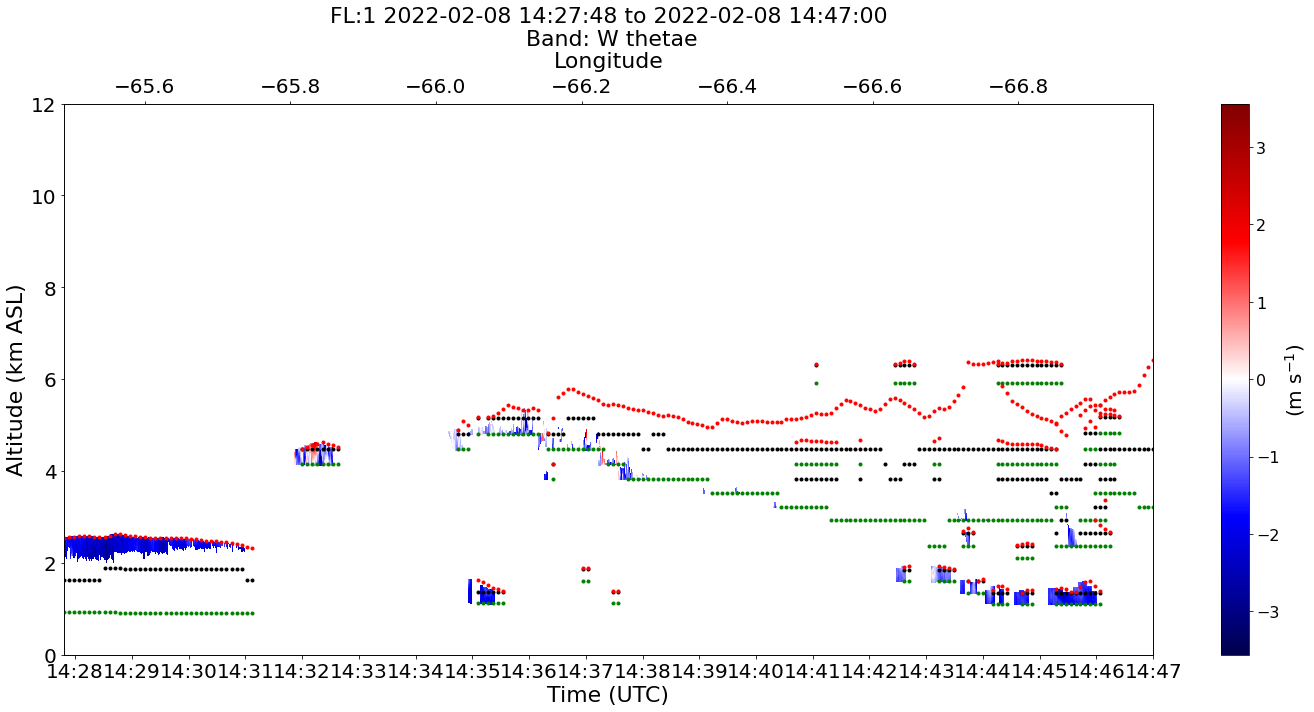

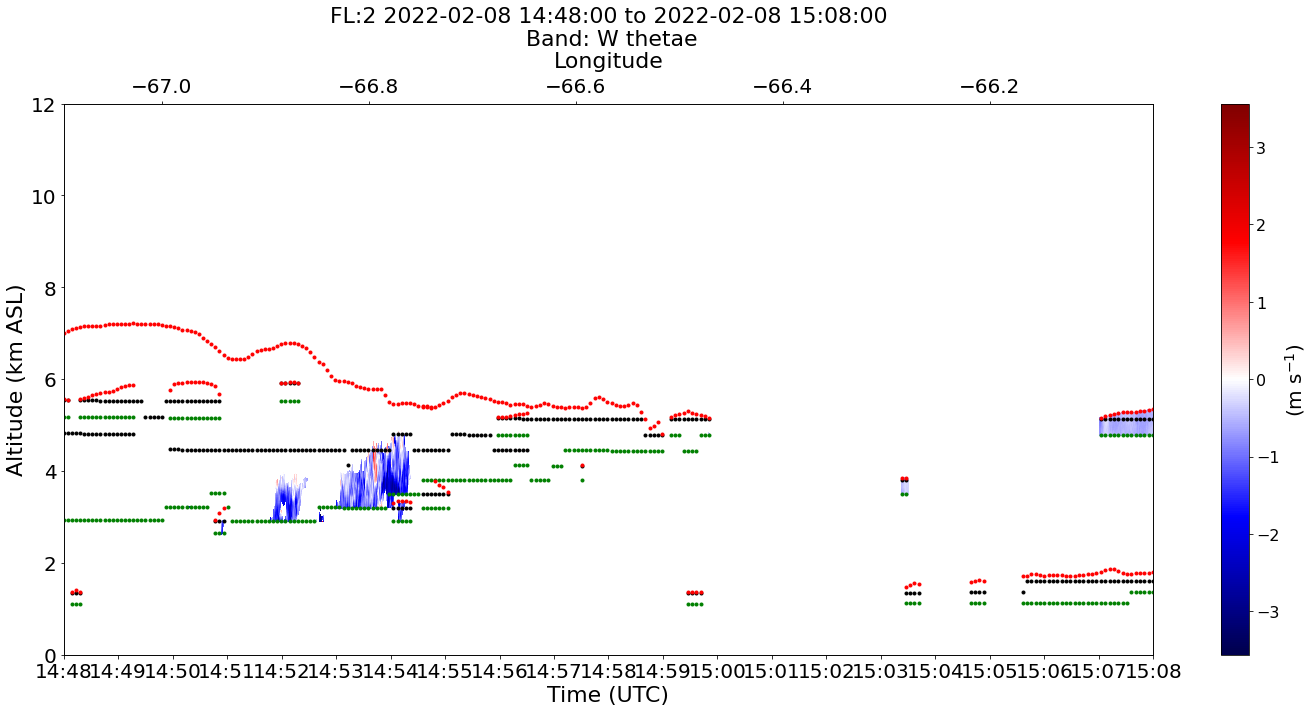

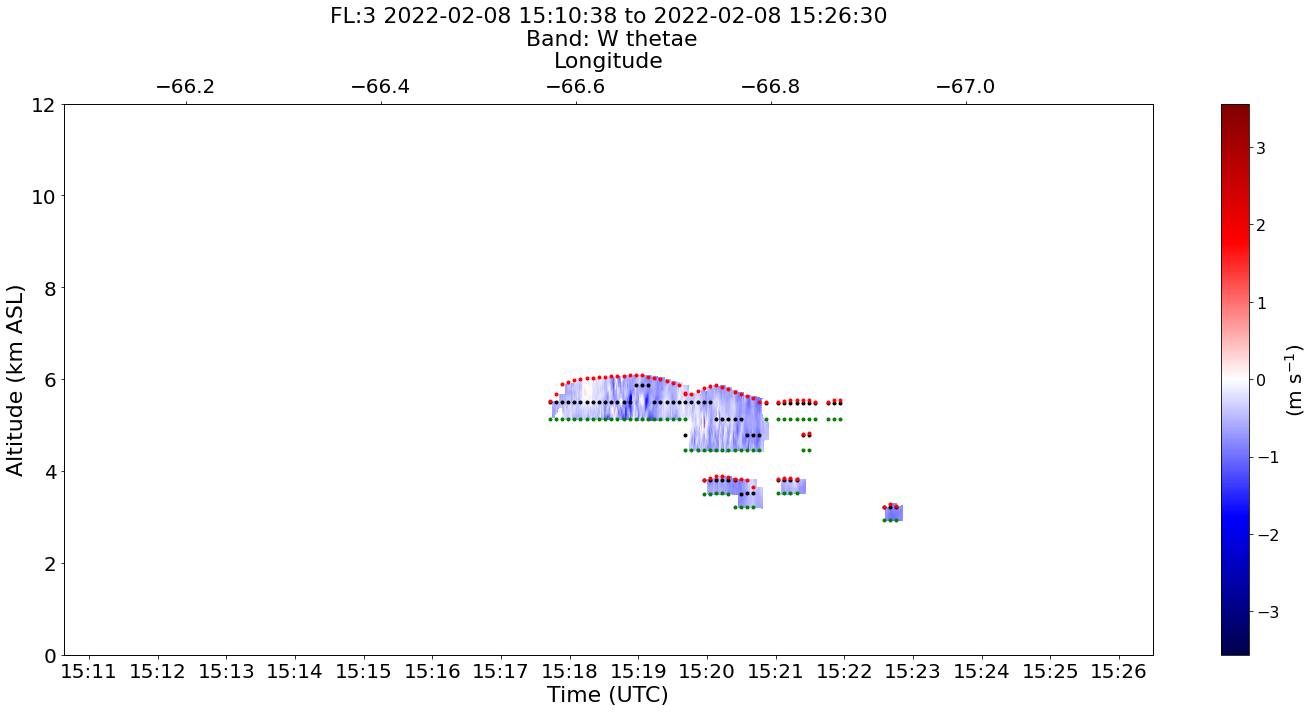

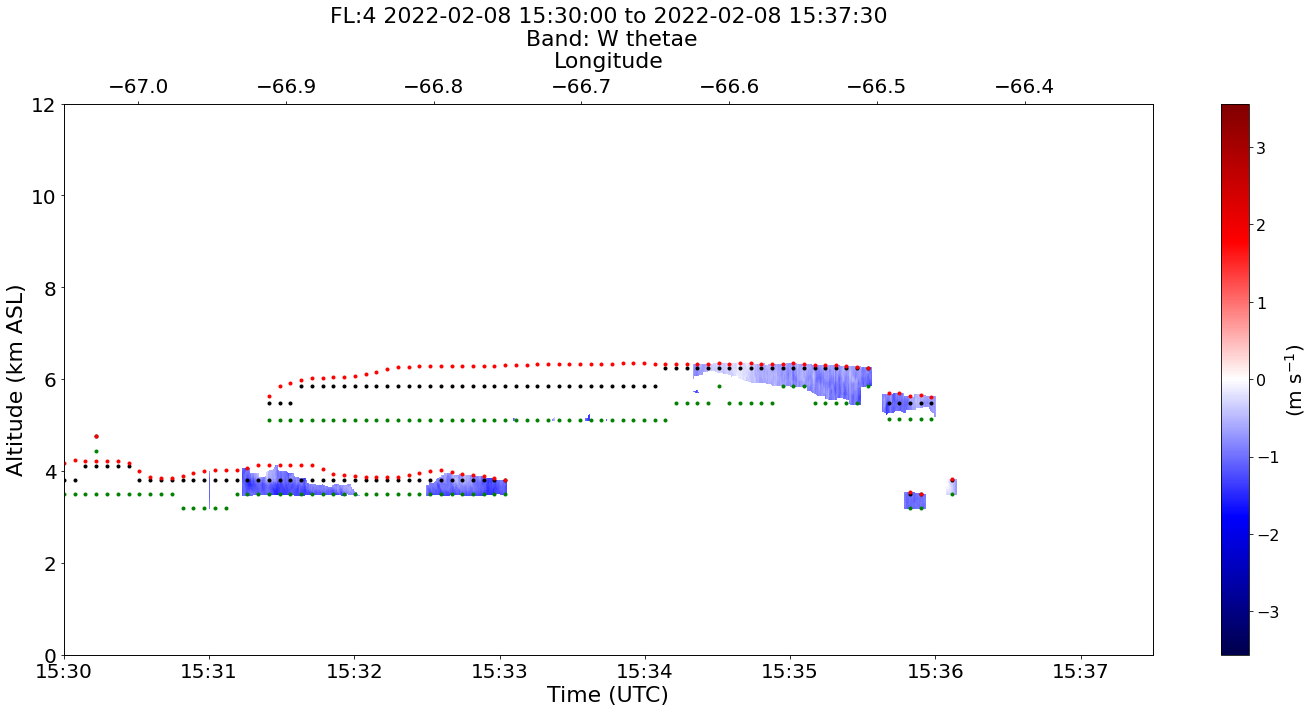

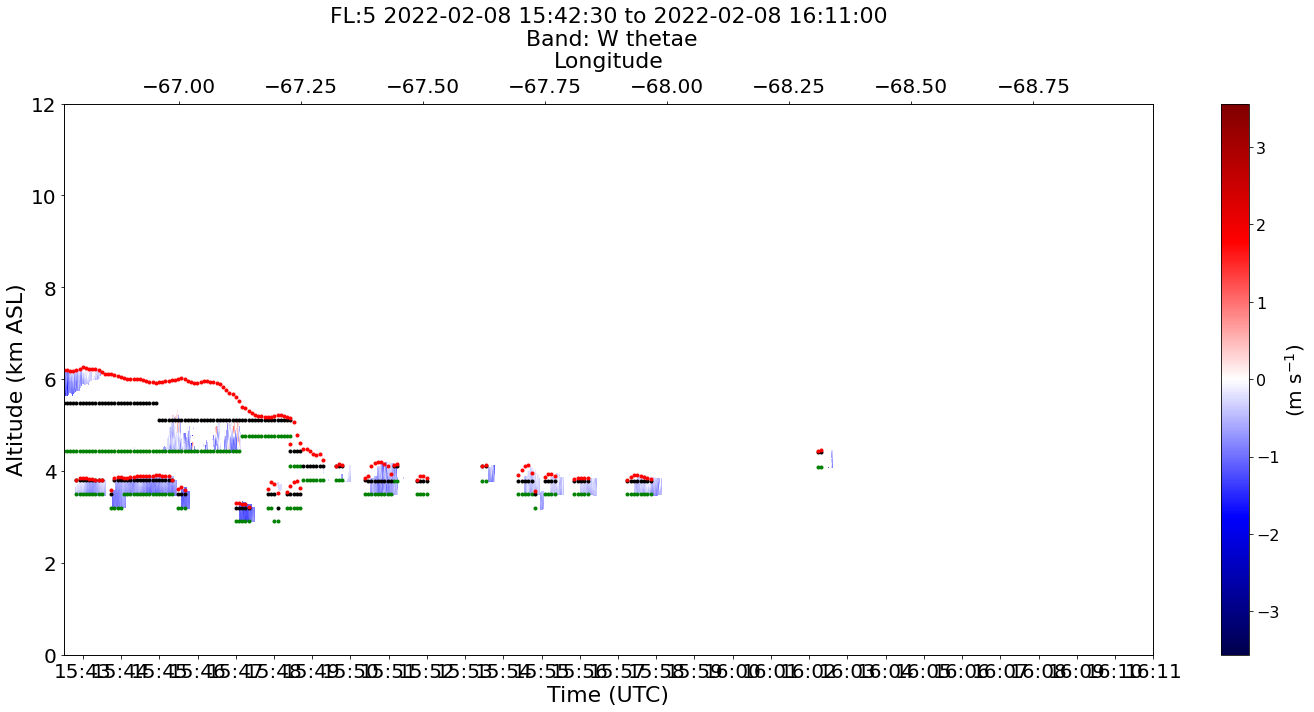

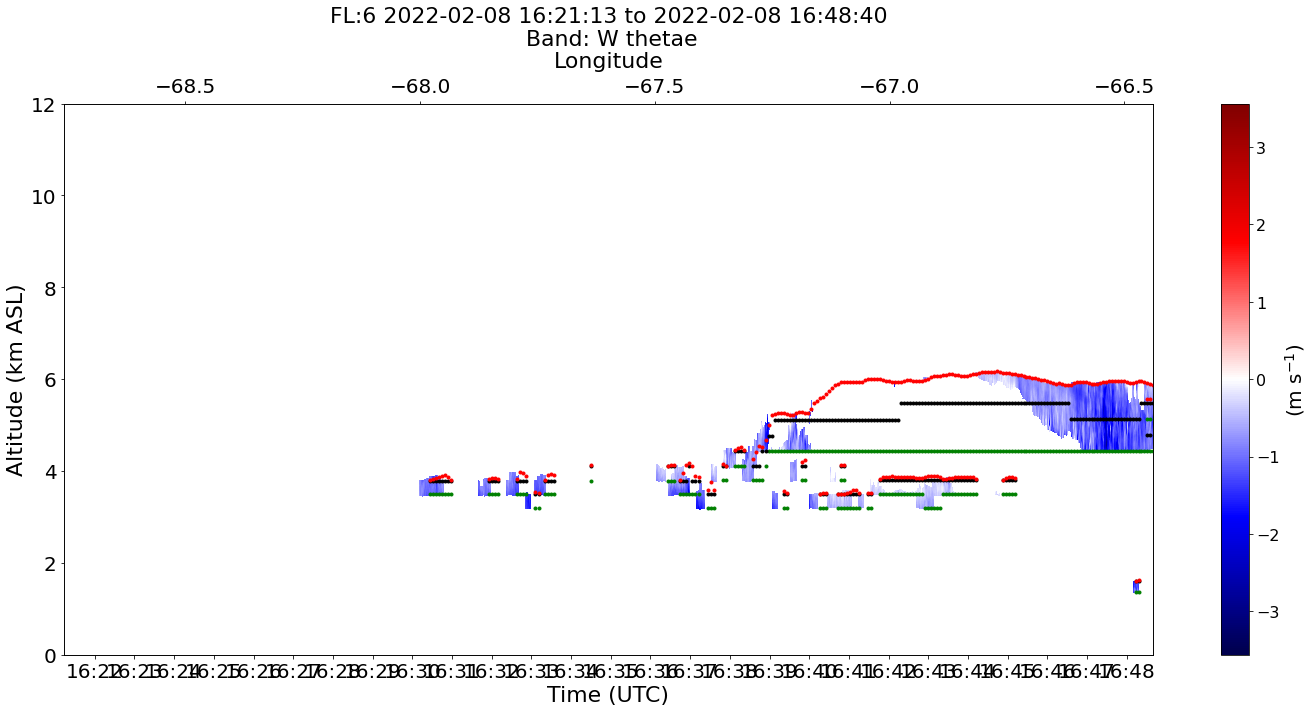

In [252]:
print(mbma_wfiledays[d])
er2_flight_legs, lowtype, wfile=fldef(mbma_wfiledays[d])

vrfile=empty_unstable_vr[1::,:]
lat_lon_distance=mbma_lat_lon_distlst[d].iloc[1::,:]
y_w=mbma_hgtlst[d][1::,:]
timedf=mbma_timelst[d][1::,:]

for flidx in range(len(er2_flight_legs)):
# for flidx in range(1):
#     flidx=0
    fl=flidx+1
    leg_start=er2_flight_legs[flidx][0]
    leg_end=er2_flight_legs[flidx][1]

    vrdf_leg=pd.DataFrame(vrfile[:,:], index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
    hgtdf_leg=pd.DataFrame(y_w[:,:], index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
    latlondf_leg=pd.DataFrame(lat_lon_distance, index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)

    indices_of_time = np.where((timedf[:,0] > np.datetime64(leg_start)) & (timedf[:,0] < np.datetime64(leg_end)))[0]
    time_subset= timedf[indices_of_time[0]-1:indices_of_time[-1]+2,:]

    flmbma_epidf=mbma_combdf.iloc[np.where((mbma_combdf['Day']==int(mbma_wfiledays[d]))&(mbma_combdf['Flight Leg']==fl))[0],:]


    fig,ax = plt.subplots(figsize=(20,10))

    pm = ax.pcolormesh(time_subset,hgtdf_leg/1000, vrdf_leg,vmin=-3.56, vmax=3.56, cmap = 'seismic', rasterized = True) 

    ax.set_ylim(0, 12)

    ax.xaxis.set_major_locator(md.MinuteLocator())
    ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

    xformatter = md.DateFormatter('%H:%M')
    xlocator = md.MinuteLocator(byminute=np.arange(0, 60, 1), interval = 1)


    minutes = md.MinuteLocator(byminute=np.arange(0, 60, 1), interval = 1)

    ax.xaxis.set_major_locator(xlocator)
    ax.xaxis.set_minor_locator(minutes)

    ax.tick_params(which='both',labelsize=20)
    ax.set_xlabel('Time (UTC)',fontsize=22)
    ax.set_ylabel('Altitude (km ASL)',fontsize=22)

    cbar = plt.colorbar(pm, label = 'm s$^{-1}$)')
    cbar.ax.tick_params(labelsize=16) 
    cbar.set_label(label='(m s$^{-1}$)',fontsize=20)

    ax2 = ax.twiny()
    ax2.set_xlim(latlondf_leg['lon'][0], latlondf_leg['lon'][-1])    
    ax2.set_xlabel('Longitude',fontsize=22, labelpad = 10)
    ax2.tick_params(which='both',labelsize=20)


    ax.set_title('FL:'+str(er2_flight_legs[flidx][2])+' '+str(leg_start)+' to '+str(leg_end)+'\n Band: W thetae', fontsize=22)

    plt.tight_layout()

    title_subset='FL:'+str(er2_flight_legs[flidx][2])+' '+str(leg_start)+' to '+str(leg_end)+'\n Band: W thetae'

    plt.plot(np.asarray(flmbma_epidf['ER-2 Lon'].values, dtype=float), np.asarray(flmbma_epidf['Height at Base of USL (m)'].values, dtype=float)/1000,'.', c='green', linewidth=8)
    plt.plot(np.asarray(flmbma_epidf['ER-2 Lon'].values, dtype=float), np.asarray(flmbma_epidf['Height at Top of USL (m)'].values, dtype=float)/1000,'.', c='black', linewidth=8)
    plt.plot(np.asarray(flmbma_epidf['ER-2 Lon'].values, dtype=float), np.asarray(flmbma_epidf['Interp EL Height (m)'].values, dtype=float)/1000,'.', c='red', linewidth=8)    

20220208


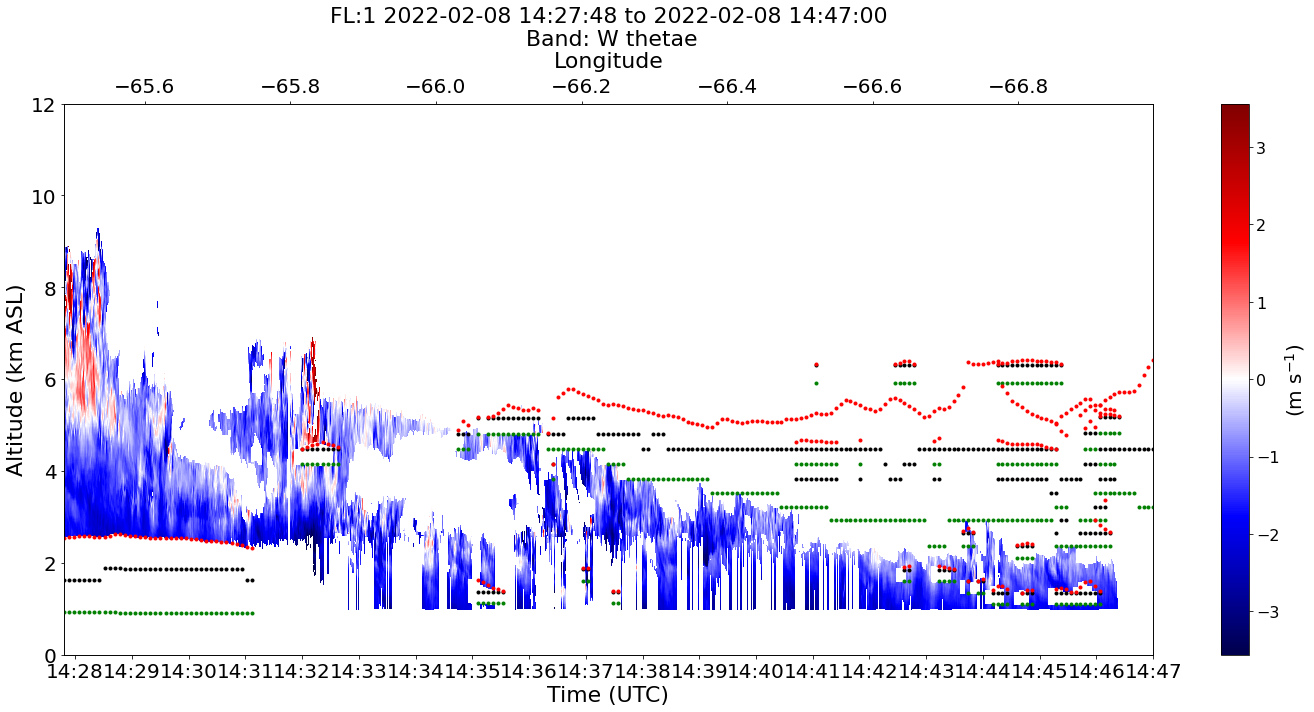

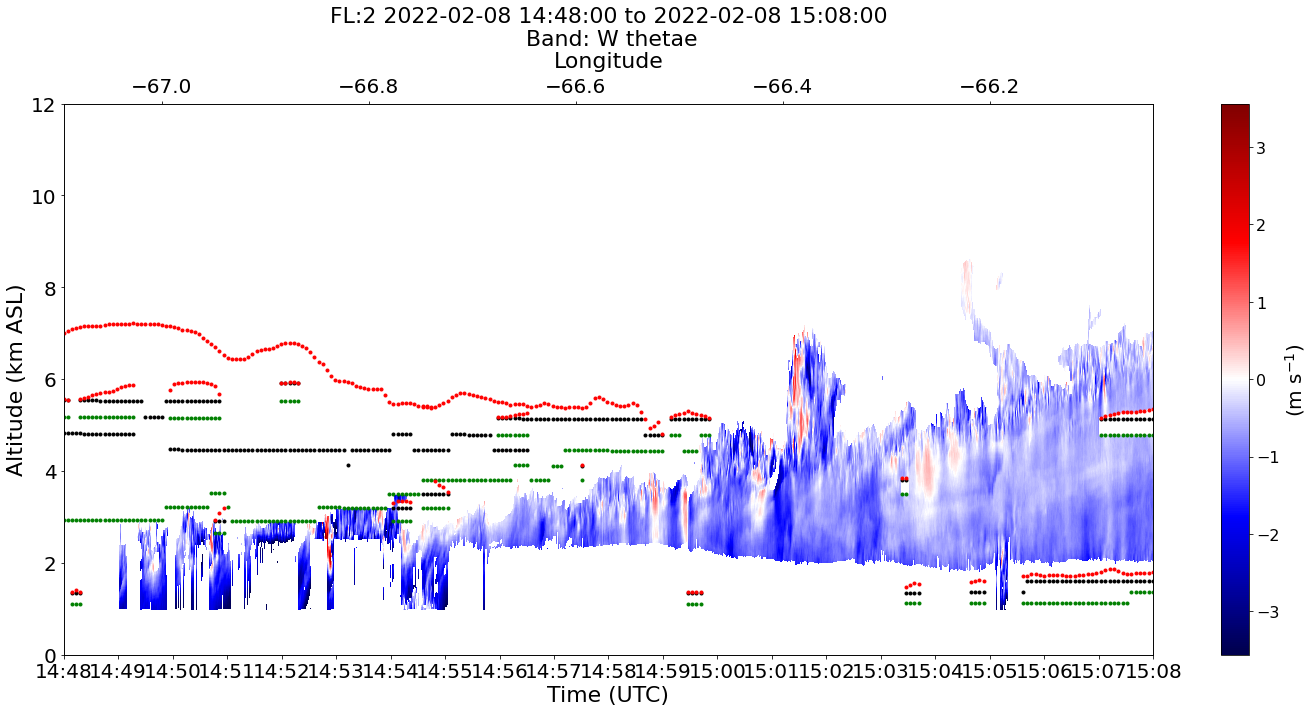

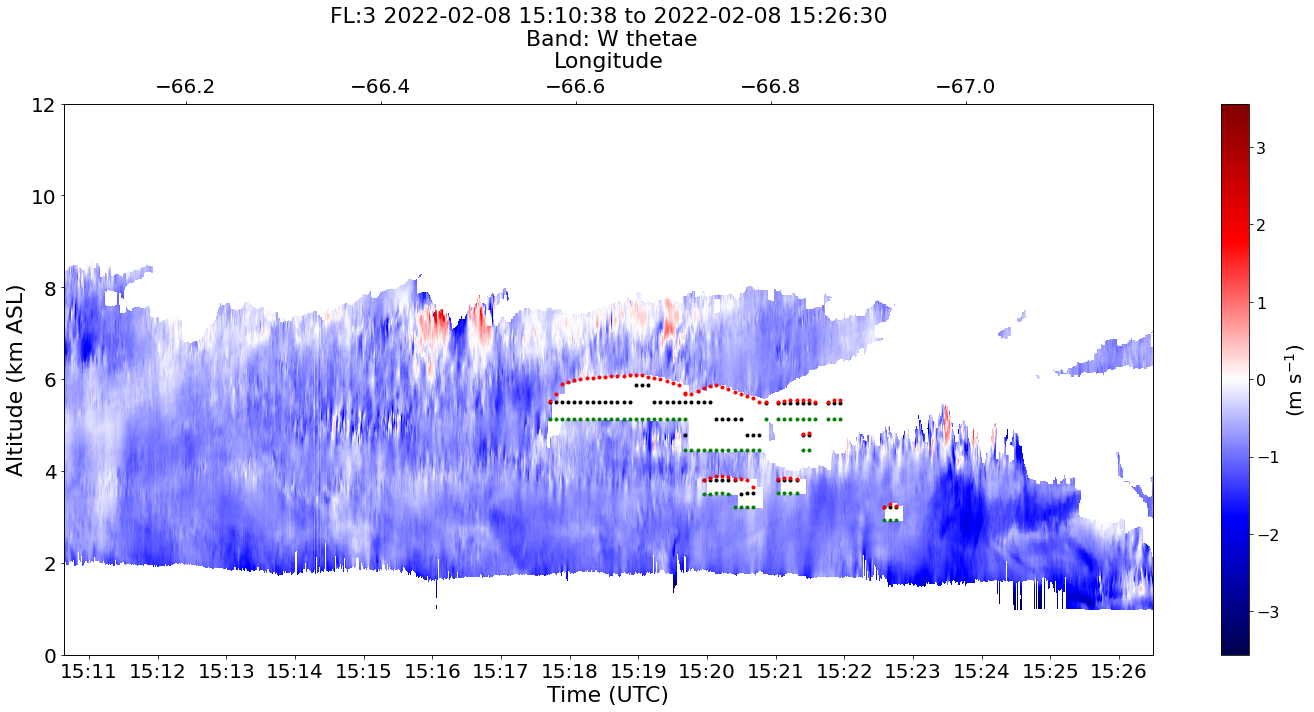

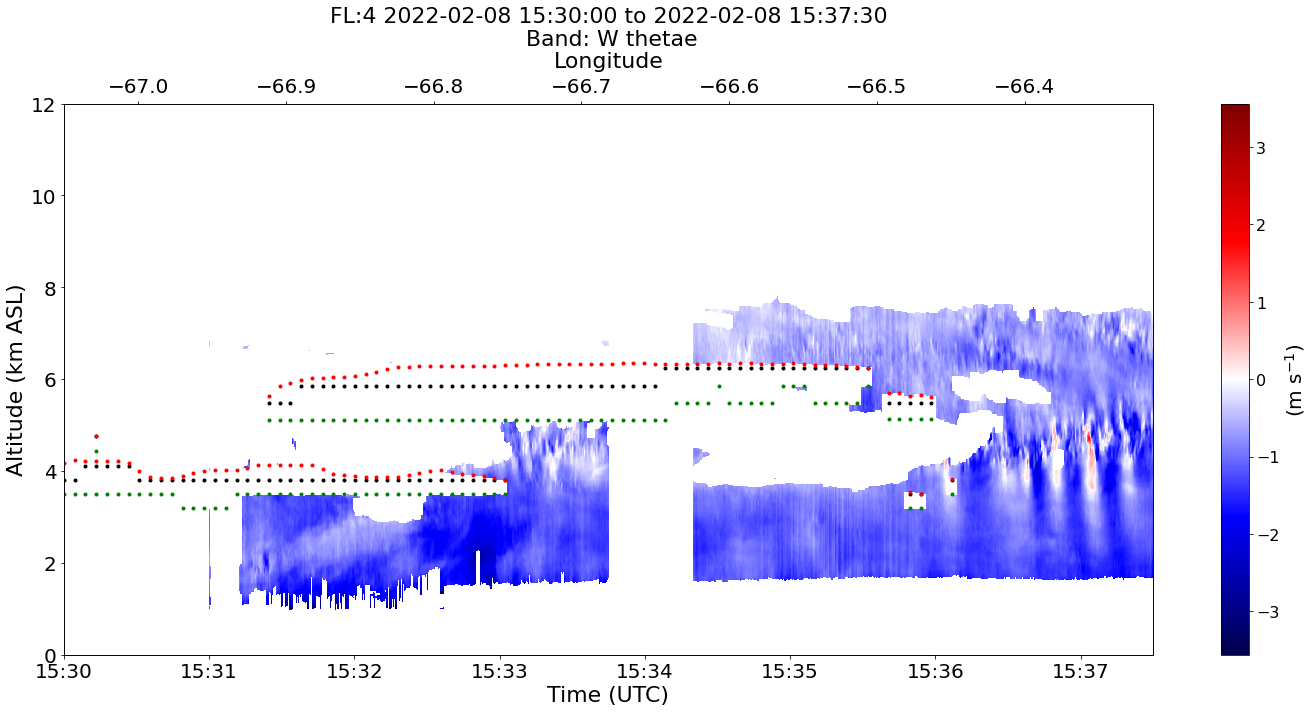

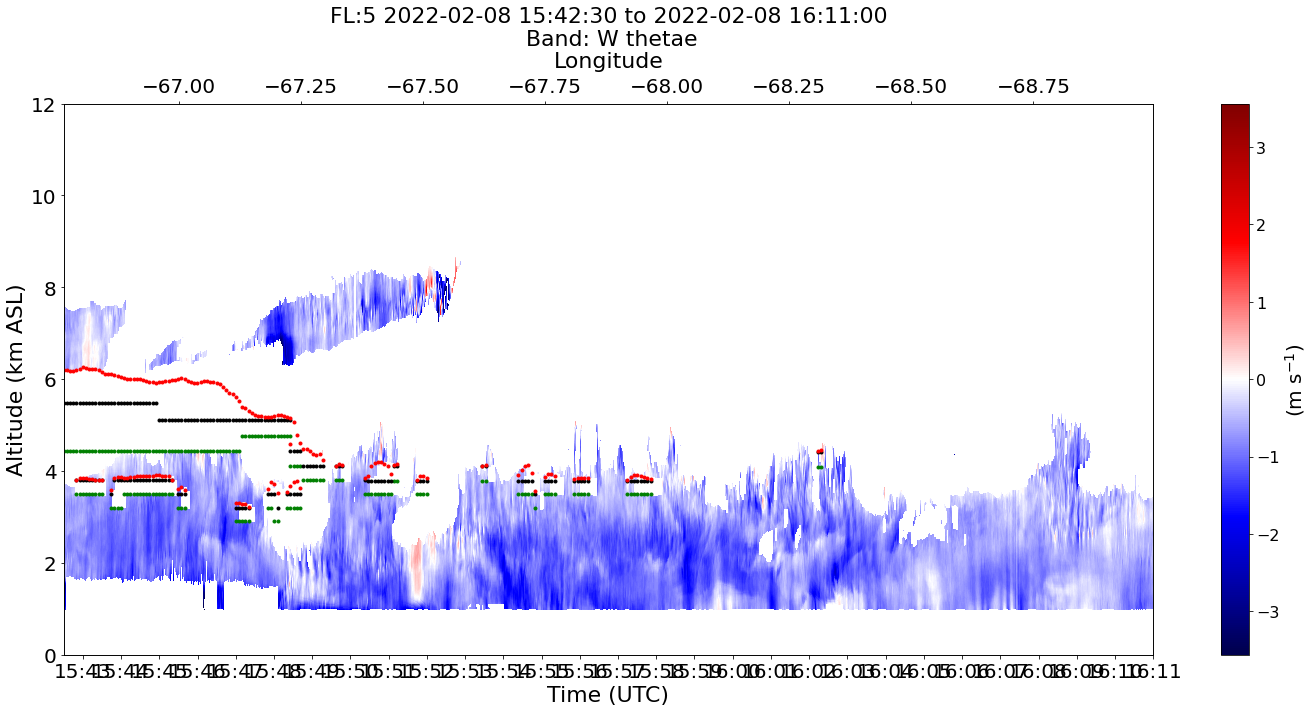

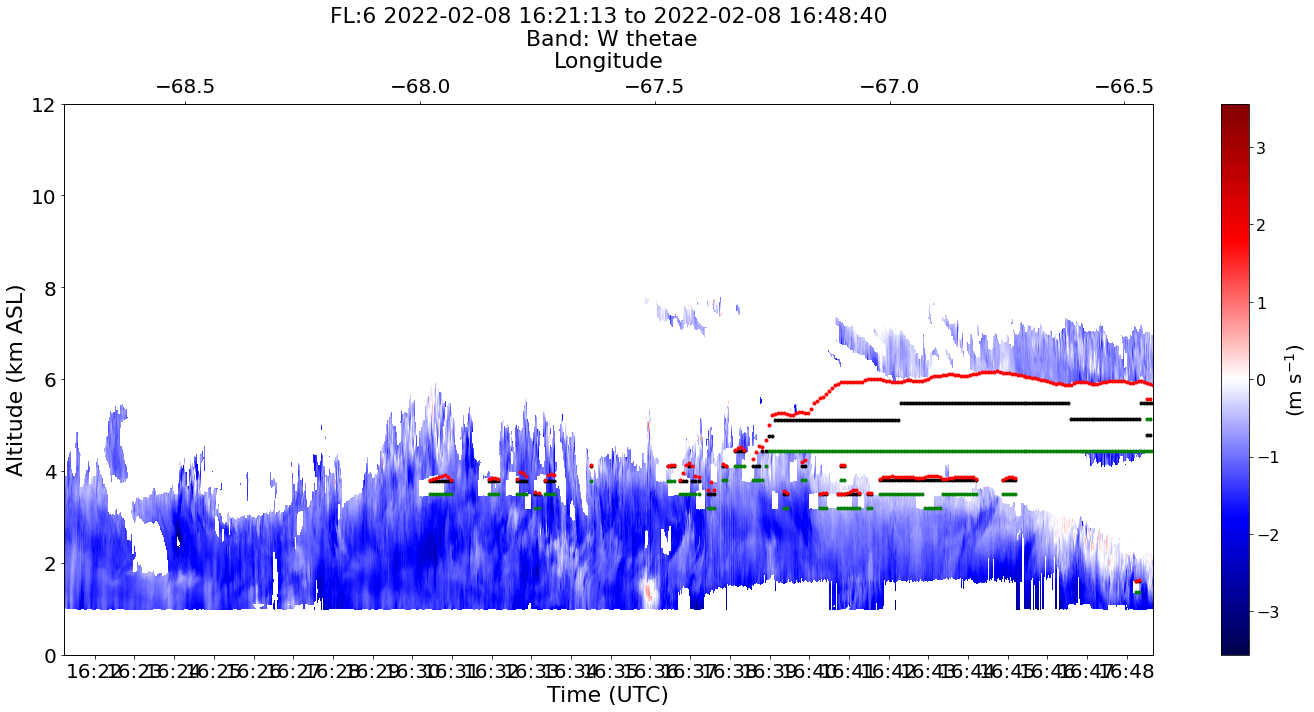

In [253]:
print(mbma_wfiledays[d])
er2_flight_legs, lowtype, wfile=fldef(mbma_wfiledays[d])

vrfile=empty_stable_vr[1::,:]
lat_lon_distance=mbma_lat_lon_distlst[d].iloc[1::,:]
y_w=mbma_hgtlst[d][1::,:]
timedf=mbma_timelst[d][1::,:]

for flidx in range(len(er2_flight_legs)):
# for flidx in range(1):
#     flidx=0
    fl=flidx+1
    leg_start=er2_flight_legs[flidx][0]
    leg_end=er2_flight_legs[flidx][1]

    vrdf_leg=pd.DataFrame(vrfile[:,:], index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
    hgtdf_leg=pd.DataFrame(y_w[:,:], index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
    latlondf_leg=pd.DataFrame(lat_lon_distance, index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)

    indices_of_time = np.where((timedf[:,0] > np.datetime64(leg_start)) & (timedf[:,0] < np.datetime64(leg_end)))[0]
    time_subset= timedf[indices_of_time[0]-1:indices_of_time[-1]+2,:]

    flmbma_epidf=mbma_combdf.iloc[np.where((mbma_combdf['Day']==int(mbma_wfiledays[d]))&(mbma_combdf['Flight Leg']==fl))[0],:]

    fig,ax = plt.subplots(figsize=(20,10))

    pm = ax.pcolormesh(time_subset,hgtdf_leg/1000, vrdf_leg,vmin=-3.56, vmax=3.56, cmap = 'seismic', rasterized = True) 

    ax.set_ylim(0, 12)

    ax.xaxis.set_major_locator(md.MinuteLocator())
    ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

    xformatter = md.DateFormatter('%H:%M')
    xlocator = md.MinuteLocator(byminute=np.arange(0, 60, 1), interval = 1)


    minutes = md.MinuteLocator(byminute=np.arange(0, 60, 1), interval = 1)

    ax.xaxis.set_major_locator(xlocator)
    ax.xaxis.set_minor_locator(minutes)

    ax.tick_params(which='both',labelsize=20)
    ax.set_xlabel('Time (UTC)',fontsize=22)
    ax.set_ylabel('Altitude (km ASL)',fontsize=22)

    cbar = plt.colorbar(pm, label = 'm s$^{-1}$)')
    cbar.ax.tick_params(labelsize=16) 
    cbar.set_label(label='(m s$^{-1}$)',fontsize=20)

    ax2 = ax.twiny()
    ax2.set_xlim(latlondf_leg['lon'][0], latlondf_leg['lon'][-1])    
    ax2.set_xlabel('Longitude',fontsize=22, labelpad = 10)
    ax2.tick_params(which='both',labelsize=20)


    ax.set_title('FL:'+str(er2_flight_legs[flidx][2])+' '+str(leg_start)+' to '+str(leg_end)+'\n Band: W thetae', fontsize=22)

    plt.tight_layout()

    title_subset='FL:'+str(er2_flight_legs[flidx][2])+' '+str(leg_start)+' to '+str(leg_end)+'\n Band: W thetae'

    plt.plot(np.asarray(flmbma_epidf['ER-2 Lon'].values, dtype=float), np.asarray(flmbma_epidf['Height at Base of USL (m)'].values, dtype=float)/1000,'.', c='green', linewidth=8)
    plt.plot(np.asarray(flmbma_epidf['ER-2 Lon'].values, dtype=float), np.asarray(flmbma_epidf['Height at Top of USL (m)'].values, dtype=float)/1000,'.', c='black', linewidth=8)
    plt.plot(np.asarray(flmbma_epidf['ER-2 Lon'].values, dtype=float), np.asarray(flmbma_epidf['Interp EL Height (m)'].values, dtype=float)/1000,'.', c='red', linewidth=8)

## Plotting Vr in specific EPI Strength Bin

In [140]:
# for d in range(len(mbma_wfiledays)):
#     print(mbma_wfiledays[d])
print(mbma_wfiledays[d])
er2_flight_legs, lowtype, wfile=fldef(mbma_wfiledays[d])

vrfile=mbma_vr_lst[d]
for_empty=vrfile.copy()
for_bin=vrfile.copy()

lat_lon_distance=mbma_lat_lon_distlst[d]
y_w=mbma_hgtlst[d]
timedf=mbma_timelst[d]


bin_test_vr=np.ones(vrfile.shape)*np.NaN

#for flidx in range(len(er2_flight_legs)):
for flidx in range(1):
    flidx=0
    fl=flidx+1
    print('fl',fl)
    print('_______')
    leg_start=er2_flight_legs[flidx][0]
    leg_end=er2_flight_legs[flidx][1]

    flogdf=mbma_combdf.iloc[np.where((mbma_combdf['Day']==int(mbma_wfiledays[d]))&(mbma_combdf['Flight Leg']==fl))[0]]

    vrdf_leg=pd.DataFrame(vrfile[:,:], index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
    hgtdf_leg=pd.DataFrame(y_w[:,:], index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
    latlondf_leg=pd.DataFrame(lat_lon_distance, index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
    FLbearing=bearing(latlondf_leg['lat'].values[0],latlondf_leg['lat'].values[-1],latlondf_leg['lon'].values[0],latlondf_leg['lon'].values[-1])

    indices_of_time = np.where((timedf[:,0] > np.datetime64(leg_start)) & (timedf[:,0] < np.datetime64(leg_end)))[0]
    time_subset= timedf[indices_of_time[0]-1:indices_of_time[-1]+2,:]
    ################   
    for k in range(flogdf.shape[0]):

        alat, alon=get_point_at_distance(flogdf['ER-2 Lat'].values[k], flogdf['ER-2 Lon'].values[k], 0.5, FLbearing-180, 6371)
        blat, blon=get_point_at_distance(flogdf['ER-2 Lat'].values[k], flogdf['ER-2 Lon'].values[k], 0.5, FLbearing, 6371)

        adistmin=9999999
        bdistmin=9999999
        for llidx in range(latlondf_leg.shape[0]):
            adist=great_circle([alat, latlondf_leg['lat'].values[llidx]],[alon, latlondf_leg['lon'].values[llidx]])
            bdist=great_circle([blat, latlondf_leg['lat'].values[llidx]],[blon, latlondf_leg['lon'].values[llidx]])
            if adist<adistmin:
                adistmin=adist
                avridx=llidx
                latta,lonta=latlondf_leg['lat'].values[llidx], latlondf_leg['lon'].values[llidx]
            if bdist<bdistmin:
                bdistmin=bdist
                bvridx=llidx
                lattb,lontb=latlondf_leg['lat'].values[llidx], latlondf_leg['lon'].values[llidx]

        ai=np.where((lat_lon_distance['lat']==latlondf_leg['lat'].values[avridx])&(timedf[1::,0]==time_subset[avridx,0]))[0][0]
        bi=np.where((lat_lon_distance['lat']==latlondf_leg['lat'].values[bvridx])&(timedf[1::,0]==time_subset[bvridx,0]))[0][0]

        if avridx<bvridx:
            hgtdf_leg_sub=hgtdf_leg[avridx:bvridx+1]

        if avridx>bvridx:
            hgtdf_leg_sub=hgtdf_leg[bvridx:avridx+1]
    ######################

        hgt_diff_base=np.abs(hgtdf_leg_sub-float(flogdf['Height at Base of USL (m)'].iloc[k]))
        hgt_diff_top=np.abs(hgtdf_leg_sub-float(flogdf['Interp EL Height (m)'].iloc[k]))
        for row in range(hgt_diff_base.shape[0]):
            baseidx=np.min(np.argmin(hgt_diff_base.iloc[row,:]))
        for row in range(hgt_diff_top.shape[0]):
            topidx=np.min(np.argmin(hgt_diff_top.iloc[row,:]))

        if avridx<bvridx:
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-3 to -2':
                bin_test_vr[ai:bi+1,topidx:baseidx+1]=for_empty[ai:bi+1,topidx:baseidx+1]

        if avridx>bvridx:
            bin_test_vr[bi:ai+1,topidx:baseidx+1]=for_empty[bi:ai+1,topidx:baseidx+1]
            if flogdf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-3 to -2':
                bin_test_vr[bi:ai+1,topidx:baseidx+1]=for_empty[bi:ai+1,topidx:baseidx+1]

20200125
fl 1
_______


20200125


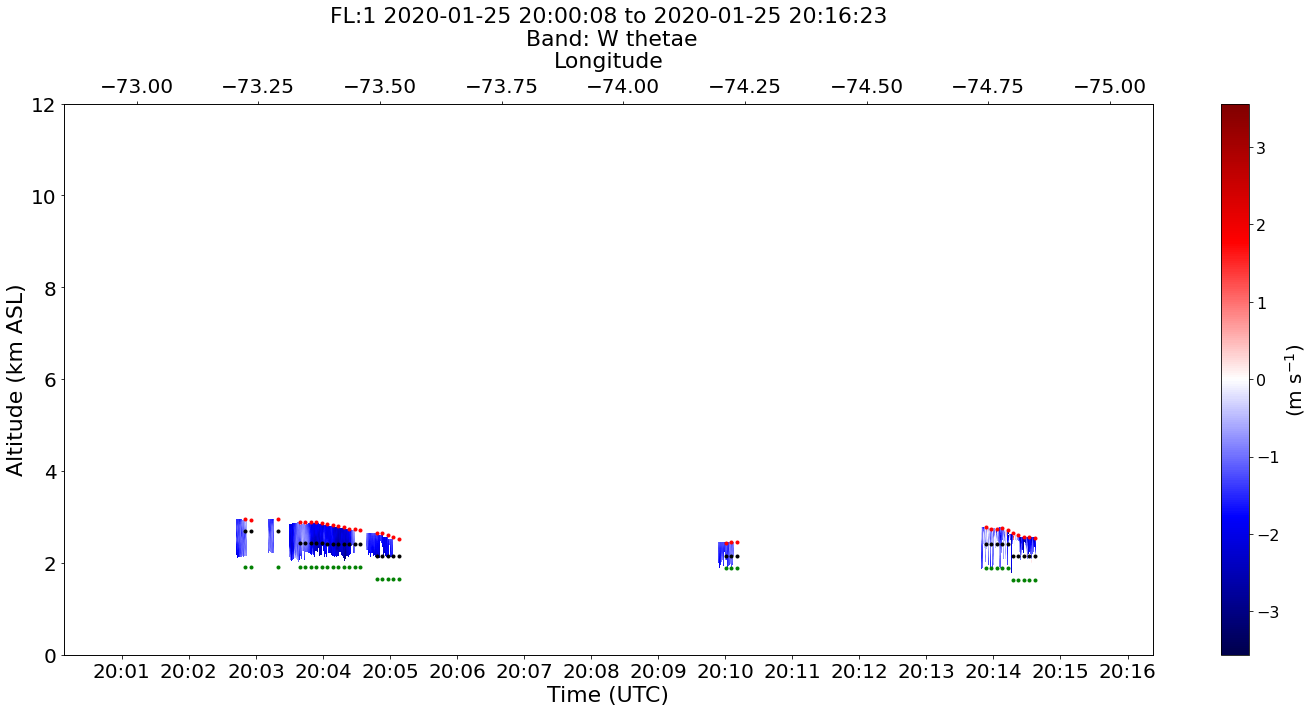

In [141]:
print(mbma_wfiledays[d])
er2_flight_legs, lowtype, wfile=fldef(mbma_wfiledays[d])

vrfile=bin_test_vr[1::,:]
lat_lon_distance=mbma_lat_lon_distlst[d].iloc[1::,:]
y_w=mbma_hgtlst[d][1::,:]
timedf=mbma_timelst[d][1::,:]

# for flidx in range(len(er2_flight_legs)):
for flidx in range(1):
    flidx=0
    fl=flidx+1
    leg_start=er2_flight_legs[flidx][0]
    leg_end=er2_flight_legs[flidx][1]

    vrdf_leg=pd.DataFrame(vrfile[:,:], index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
    hgtdf_leg=pd.DataFrame(y_w[:,:], index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
    latlondf_leg=pd.DataFrame(lat_lon_distance, index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)

    indices_of_time = np.where((timedf[:,0] > np.datetime64(leg_start)) & (timedf[:,0] < np.datetime64(leg_end)))[0]
    time_subset= timedf[indices_of_time[0]-1:indices_of_time[-1]+2,:]

    flmbma_epidf=mbma_combdf.iloc[np.where((mbma_combdf['Day']==int(mbma_wfiledays[d]))&(mbma_combdf['Flight Leg']==fl))[0],:]

    fig,ax = plt.subplots(figsize=(20,10))

    pm = ax.pcolormesh(time_subset,hgtdf_leg/1000, vrdf_leg,vmin=-3.56, vmax=3.56, cmap = 'seismic', rasterized = True) 

    ax.set_ylim(0, 12)

    ax.xaxis.set_major_locator(md.MinuteLocator())
    ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

    xformatter = md.DateFormatter('%H:%M')
    xlocator = md.MinuteLocator(byminute=np.arange(0, 60, 1), interval = 1)


    minutes = md.MinuteLocator(byminute=np.arange(0, 60, 1), interval = 1)

    ax.xaxis.set_major_locator(xlocator)
    ax.xaxis.set_minor_locator(minutes)

    ax.tick_params(which='both',labelsize=20)
    ax.set_xlabel('Time (UTC)',fontsize=22)
    ax.set_ylabel('Altitude (km ASL)',fontsize=22)

    cbar = plt.colorbar(pm, label = 'm s$^{-1}$)')
    cbar.ax.tick_params(labelsize=16) 
    cbar.set_label(label='(m s$^{-1}$)',fontsize=20)

    ax2 = ax.twiny()
    ax2.set_xlim(latlondf_leg['lon'][0], latlondf_leg['lon'][-1])    
    ax2.set_xlabel('Longitude',fontsize=22, labelpad = 10)
    ax2.tick_params(which='both',labelsize=20)


    ax.set_title('FL:'+str(er2_flight_legs[flidx][2])+' '+str(leg_start)+' to '+str(leg_end)+'\n Band: W thetae', fontsize=22)

    plt.tight_layout()

    title_subset='FL:'+str(er2_flight_legs[flidx][2])+' '+str(leg_start)+' to '+str(leg_end)+'\n Band: W thetae'

    for k in range(flmbma_epidf.shape[0]):
        if flmbma_epidf['$d'r'\theta_e/dz$ (K/km) Bin'].iloc[k]=='-3 to -2':
            plt.plot(np.asarray(flmbma_epidf['ER-2 Lon'].values[k], dtype=float), np.asarray(flmbma_epidf['Height at Base of USL (m)'].values[k], dtype=float)/1000,'.', c='green', linewidth=8)
            plt.plot(np.asarray(flmbma_epidf['ER-2 Lon'].values[k], dtype=float), np.asarray(flmbma_epidf['Height at Top of USL (m)'].values[k], dtype=float)/1000,'.', c='black', linewidth=8)
            plt.plot(np.asarray(flmbma_epidf['ER-2 Lon'].values[k], dtype=float), np.asarray(flmbma_epidf['Interp EL Height (m)'].values[k], dtype=float)/1000,'.', c='red', linewidth=8)


# Saving files of Vr within EPI/Stable and EPI Strength

In [ ]:
path_save=

In [254]:
# Saving Vr in stable Layers
pd.DataFrame(empty_stable_vr).to_csv(path_save+mbma_wfiledays[d]+'_toEL.csv')


In [255]:
# Saving Vr in unstable layers
pd.DataFrame(empty_unstable_vr).to_csv(path_save+mbma_wfiledays[d]+'_toEL.csv')


In [257]:
# Saving files for Vr within specficic EPI layer strengths
pd.DataFrame(np.concatenate(PI6_3_vr)).to_csv(path_save+mbma_wfiledays[d]+'_toEL.csv')
pd.DataFrame(np.concatenate(PI3_2_vr)).to_csv(path_save+mbma_wfiledays[d]+'_toEL.csv')
pd.DataFrame(np.concatenate(PI2_1point5_vr)).to_csv(path_save+mbma_wfiledays[d]+'_toEL.csv')
pd.DataFrame(np.concatenate(PI1point5_1_vr)).to_csv(path_save+mbma_wfiledays[d]+'_toEL.csv')
pd.DataFrame(np.concatenate(PI1_point5_vr)).to_csv(path_save+mbma_wfiledays[d]+'_toEL.csv')
pd.DataFrame(np.concatenate(PIpoint5_0_vr)).to_csv(path_save+mbma_wfiledays[d]+'_toEL.csv')

## By EPI Characteristics

In [38]:
mbma_combdf_d200=mbma_combdf.iloc[np.where(mbma_combdf['Distance (km)']<=200)[0],:]
mbma_combdf_d200_400=mbma_combdf.iloc[np.where((mbma_combdf['Distance (km)']>200)&(mbma_combdf['Distance (km)']<=400))[0],:]
mbma_combdf_d400=mbma_combdf.iloc[np.where(mbma_combdf['Distance (km)']>400)[0],:]


In [39]:
mbma_comb_W=mbma_combdf.iloc[np.where(mbma_combdf['Region']=='W')[0],:]
mbma_comb_NW=mbma_combdf.iloc[np.where(mbma_combdf['Region']=='NW')[0],:]
mbma_comb_N=mbma_combdf.iloc[np.where(mbma_combdf['Region']=='N')[0],:]
mbma_comb_NE=mbma_combdf.iloc[np.where(mbma_combdf['Region']=='NE')[0],:]
mbma_comb_E=mbma_combdf.iloc[np.where(mbma_combdf['Region']=='E')[0],:]


In [99]:
mbma_comb_lay1=mbma_combdf.iloc[np.where(mbma_combdf['Layer #']=='1')[0],:]
mbma_comb_lay2=mbma_combdf.iloc[np.where(mbma_combdf['Layer #']=='2')[0],:]
mbma_comb_lay3=mbma_combdf.iloc[np.where(mbma_combdf['Layer #']=='3')[0],:]
mbma_comb_lay4=mbma_combdf.iloc[np.where(mbma_combdf['Layer #']=='4')[0],:]
mbma_comb_lay5=mbma_combdf.iloc[np.where(mbma_combdf['Layer #']=='5')[0],:]
mbma_comb_lay6=mbma_combdf.iloc[np.where(mbma_combdf['Layer #']=='6')[0],:]
mbma_comb_layg3=pd.concat([mbma_comb_lay3,mbma_comb_lay4,mbma_comb_lay5,mbma_comb_lay6], ignore_index=True)


In [41]:
mbma_combdf_b0_2=mbma_combdf.iloc[np.where((mbma_combdf['Height at Base of USL (m)'].astype(float)>0)&(mbma_combdf['Height at Base of USL (m)'].astype(float)<=2000))[0],:]
mbma_combdf_b2_4=mbma_combdf.iloc[np.where((mbma_combdf['Height at Base of USL (m)'].astype(float)>2000)&(mbma_combdf['Height at Base of USL (m)'].astype(float)<=4000))[0],:]
mbma_combdf_b4_6=mbma_combdf.iloc[np.where((mbma_combdf['Height at Base of USL (m)'].astype(float)>4000)&(mbma_combdf['Height at Base of USL (m)'].astype(float)<=6000))[0],:]
mbma_combdf_b6_8=mbma_combdf.iloc[np.where((mbma_combdf['Height at Base of USL (m)'].astype(float)>6000)&(mbma_combdf['Height at Base of USL (m)'].astype(float)<=8000))[0],:]
mbma_combdf_bg8=mbma_combdf.iloc[np.where(mbma_combdf['Height at Base of USL (m)'].astype(float)>8000)[0],:]


In [42]:
mbma_combdf_dPI0_point5=mbma_combdf.iloc[np.where((mbma_combdf['Depth ThetaE (m)'].astype(float)>0)&(mbma_combdf['Depth ThetaE (m)'].astype(float)<=500))[0],:]
mbma_combdf_dPIpoint5_1=mbma_combdf.iloc[np.where((mbma_combdf['Depth ThetaE (m)'].astype(float)>500)&(mbma_combdf['Depth ThetaE (m)'].astype(float)<=1000))[0],:]
mbma_combdf_dPI1_1point5=mbma_combdf.iloc[np.where((mbma_combdf['Depth ThetaE (m)'].astype(float)>1000)&(mbma_combdf['Depth ThetaE (m)'].astype(float)<=1500))[0],:]
mbma_combdf_dPI1point5_2=mbma_combdf.iloc[np.where((mbma_combdf['Depth ThetaE (m)'].astype(float)>1500)&(mbma_combdf['Depth ThetaE (m)'].astype(float)<=2000))[0],:]
mbma_combdf_dpg2=mbma_combdf.iloc[np.where(mbma_combdf['Depth ThetaE (m)'].astype(float)>2000)[0],:]


In [95]:
mbma_comb_mlay1=mbma_combdf.iloc[np.where(mbma_combdf['Max EL Layers'].astype(float)==1)[0],:]
mbma_comb_mlay2=mbma_combdf.iloc[np.where(mbma_combdf['Max EL Layers'].astype(float)==2)[0],:]
mbma_comb_mlay3=mbma_combdf.iloc[np.where(mbma_combdf['Max EL Layers'].astype(float)==3)[0],:]
mbma_comb_mlay4=mbma_combdf.iloc[np.where(mbma_combdf['Max EL Layers'].astype(float)==4)[0],:]
mbma_comb_mlay5=mbma_combdf.iloc[np.where(mbma_combdf['Max EL Layers'].astype(float)==5)[0],:]
mbma_comb_mlay6=mbma_combdf.iloc[np.where(mbma_combdf['Max EL Layers'].astype(float)==6)[0],:]

In [97]:
mbma_comb_mlay6

,Day,Flight Leg,WTEC Lat,WTEC Lon,P min,Press Grad (mb/km),ER-2 Lat,ER-2 Lon,Distance (km),Bearing (deg),...,Layer #,Cat of Layer,Height at Base of USL (m),Height at Top of USL (m),Interp EL Height (m),Depth ThetaE (m),Depth Base to EL (m),Change in ThetaE (K),dThetaE/dz (K/km),$d\theta_e/dz$ (K/km) Bin
8977,20220208,1,42.301389,-65.966667,998.271339,0.035262,41.639836,-66.911727,107.339496,227.041998,...,1,3.0,1112.0,1352.2565631623131,1386.657669174187,240.2565631623131,274.65766917418705,0.03062481524591476,-0.12746713281345481,-0.5 to 0
8978,20220208,1,42.301389,-65.966667,998.271339,0.035262,41.639836,-66.911727,107.339496,227.041998,...,2,3.0,2378.0,2652.0,2816.9576579151462,274.0,438.9576579151462,0.19076221474250588,-0.69621246256389,-1 to -0.5
8979,20220208,1,42.301389,-65.966667,998.271339,0.035262,41.639836,-66.911727,107.339496,227.041998,...,3,3.0,2934.0,3223.9999999999995,5446.114349130608,289.99999999999955,2512.1143491306084,0.15624562314269497,-0.53877801083688,-1 to -0.5
8980,20220208,1,42.301389,-65.966667,998.271339,0.035262,41.639836,-66.911727,107.339496,227.041998,...,4,3.0,3522.5131263246267,3830.377263674192,5434.343258185633,307.8641373495652,1911.8301318610065,0.22668168219797735,-0.7363042806788209,-1 to -0.5
8981,20220208,1,42.301389,-65.966667,998.271339,0.035262,41.639836,-66.911727,107.339496,227.041998,...,5,3.0,4149.026252649253,4477.026252649253,5256.090545093277,328.0,1107.0642924440235,0.11036314586471008,-0.3364730056850917,-0.5 to 0
8982,20220208,1,42.301389,-65.966667,998.271339,0.035262,41.639836,-66.911727,107.339496,227.041998,...,6,3.0,4820.0,5171.999999999999,5193.063095535636,351.9999999999991,373.0630955356364,0.021406319075424562,-0.06081340646427449,-0.5 to 0


In [101]:
def vr_selc_file(df, var):
    days_lst=[]
    char_lst=[]
    
    days=df.groupby(['Day']).count().index
    print(days)
    for n in range(len(days)):
#     for n in range(1):
#         n=0
        d=np.where(np.asarray(mbma_wfiledays)==str(days[n]))[0][0]

        vrfile=mbma_vr_lst[d]
        for_empty=vrfile.copy()

        lat_lon_distance=mbma_lat_lon_distlst[d]
        y_w=mbma_hgtlst[d]
        timedf=mbma_timelst[d]

        char_vr=np.ones(vrfile.shape)*np.NaN

        fl_lst=df.iloc[np.where(df['Day']==days[n])[0],:].groupby('Flight Leg').count().index
        er2_flight_legs, lowtype, wfile=fldef(mbma_wfiledays[d])
        
        print(mbma_wfiledays[d])
        print(fl_lst)
        for n2 in range(len(fl_lst)):
            fl=fl_lst[n2]
            flidx=fl-1

            leg_start=er2_flight_legs[flidx][0]
            leg_end=er2_flight_legs[flidx][1]

            flogdf=df.iloc[np.where((df['Day']==int(mbma_wfiledays[d]))&(df['Flight Leg']==fl))[0]]

            vrdf_leg=pd.DataFrame(vrfile[:,:], index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
            hgtdf_leg=pd.DataFrame(y_w[:,:], index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
            latlondf_leg=pd.DataFrame(lat_lon_distance, index=timedf[:,0]).between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)
            FLbearing=bearing(latlondf_leg['lat'].values[0],latlondf_leg['lat'].values[-1],latlondf_leg['lon'].values[0],latlondf_leg['lon'].values[-1])

            indices_of_time = np.where((timedf[:,0] > np.datetime64(leg_start)) & (timedf[:,0] < np.datetime64(leg_end)))[0]
            time_subset= timedf[indices_of_time[0]-1:indices_of_time[-1]+2,:]

            #####
            for k in range(flogdf.shape[0]):
                alat, alon=get_point_at_distance(flogdf['ER-2 Lat'].values[k], flogdf['ER-2 Lon'].values[k], 0.5, FLbearing-180, 6371)
                blat, blon=get_point_at_distance(flogdf['ER-2 Lat'].values[k], flogdf['ER-2 Lon'].values[k], 0.5, FLbearing, 6371)

                adistmin=9999999
                bdistmin=9999999
                for llidx in range(latlondf_leg.shape[0]):
                    adist=great_circle([alat, latlondf_leg['lat'].values[llidx]],[alon, latlondf_leg['lon'].values[llidx]])
                    bdist=great_circle([blat, latlondf_leg['lat'].values[llidx]],[blon, latlondf_leg['lon'].values[llidx]])
                    if adist<adistmin:
                        adistmin=adist
                        avridx=llidx
                        latta,lonta=latlondf_leg['lat'].values[llidx], latlondf_leg['lon'].values[llidx]
                    if bdist<bdistmin:
                        bdistmin=bdist
                        bvridx=llidx
                        lattb,lontb=latlondf_leg['lat'].values[llidx], latlondf_leg['lon'].values[llidx]

                ai=np.where((lat_lon_distance['lat']==latlondf_leg['lat'].values[avridx])&(timedf[1::,0]==time_subset[avridx,0]))[0][0]
                bi=np.where((lat_lon_distance['lat']==latlondf_leg['lat'].values[bvridx])&(timedf[1::,0]==time_subset[bvridx,0]))[0][0]

                if avridx<bvridx:
                    hgtdf_leg_sub=hgtdf_leg[avridx:bvridx+1]

                if avridx>bvridx:
                    hgtdf_leg_sub=hgtdf_leg[bvridx:avridx+1]

                ######################
                hgt_diff_base=np.abs(hgtdf_leg_sub-float(flogdf['Height at Base of USL (m)'].iloc[k]))
                hgt_diff_top=np.abs(hgtdf_leg_sub-float(flogdf['Interp EL Height (m)'].iloc[k]))
                for row in range(hgt_diff_base.shape[0]):
                    baseidx=np.min(np.argmin(hgt_diff_base.iloc[row,:]))
                for row in range(hgt_diff_top.shape[0]):
                    topidx=np.min(np.argmin(hgt_diff_top.iloc[row,:]))

                if avridx<bvridx:
                    char_vr[ai:bi+1,topidx:baseidx+1]=for_empty[ai:bi+1,topidx:baseidx+1]

                if avridx>bvridx:
                    char_vr[bi:ai+1,topidx:baseidx+1]=for_empty[bi:ai+1,topidx:baseidx+1]

            print(fl)
            
        pd.DataFrame(char_vr).to_csv(path_save+var+'_'+mbma_wfiledays[d]+'.csv')
        
        char_lst.append(char_vr)
        days_lst.append(mbma_wfiledays[d])
    return(char_lst, days_lst)

In [117]:
char_lst_fill, days_lst_fill=vr_selc_file(mbma_comb_mlay6, 'maxlay_6')

Int64Index([20220208], dtype='int64', name='Day')
20220208
Int64Index([1], dtype='int64', name='Flight Leg')
1
